
Project Name-PRCP-1023-COVID-19 PREDICTION

Team Members:

1.Ashish Ray Mohapatra

2.Ancil Xavier

3.Ramchandra Rao
    

   # Business Case : COVID-19 Confirm cases prediction

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [2]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv', )

In [3]:
df.drop(columns=['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

In [4]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,Albania,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,Algeria,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,Andorra,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,Angola,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,Western Sahara,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,Yemen,0,0,0,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,Zambia,0,0,0,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


### Transpose data

In [5]:
df = df.melt(id_vars="Country/Region", 
        var_name="Date", 
        value_name="Cases")

In [6]:
df.head()

,Country/Region,Date,Cases
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [7]:
# time series model requires Date/time to be in the datetime type not object type.
# so convert it to datetime.

df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64904 entries, 0 to 64903
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  64904 non-null  object        
 1   Date            64904 non-null  datetime64[ns]
 2   Cases           64904 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.5+ MB


In [9]:
df10 = df

In [10]:
df10['Month'] = pd.DatetimeIndex(df10['Date']).month

In [11]:
df10

,Country/Region,Date,Cases,Month
0,Afghanistan,2020-01-22,0,1
1,Albania,2020-01-22,0,1
2,Algeria,2020-01-22,0,1
3,Andorra,2020-01-22,0,1
4,Angola,2020-01-22,0,1
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,36151,9
64900,Western Sahara,2020-09-21,10,9
64901,Yemen,2020-09-21,2028,9
64902,Zambia,2020-09-21,14175,9


In [12]:
df10.Month = df10.Month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep'})

In [13]:
df10

,Country/Region,Date,Cases,Month
0,Afghanistan,2020-01-22,0,Jan
1,Albania,2020-01-22,0,Jan
2,Algeria,2020-01-22,0,Jan
3,Andorra,2020-01-22,0,Jan
4,Angola,2020-01-22,0,Jan
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,36151,Sep
64900,Western Sahara,2020-09-21,10,Sep
64901,Yemen,2020-09-21,2028,Sep
64902,Zambia,2020-09-21,14175,Sep


In [14]:
df10.Month.value_counts()

Jul    8246
May    8246
Aug    8246
Mar    8246
Jun    7980
Apr    7980
Feb    7714
Sep    5586
Jan    2660
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='count'>

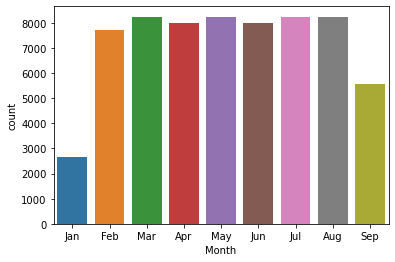

In [15]:
df10.Month.value_counts()
sns.countplot(x='Month',data=df10)

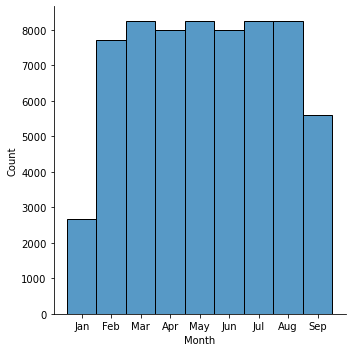

In [16]:
sns.displot(df10.Month, kind='hist')

In [17]:
df11 = df10

In [18]:
df11 = df11.groupby('Month').sum()

In [19]:
df11

,Cases
Month,
Apr,63427102
Aug,671062374
Feb,1672007
Jan,38533
Jul,431529291
Jun,246564246
Mar,9023053
May,145040173
Sep,598275439


In [20]:
df12=df10

In [21]:
df12 = df12.groupby(['Country/Region','Month'])['Cases'].sum().unstack()

In [22]:
df12

Month,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Sep
Country/Region,,,,,,,,,
Afghanistan,27237,1163050,6,0,1077445,750884,1219,225655,811080
Albania,15632,230278,0,0,119660,50880,2232,28873,231759
Algeria,69497,1185076,5,0,674286,337819,4823,211394,1000251
Andorra,19106,31382,0,0,27174,25511,2787,23498,28598
Angola,601,59160,0,0,20049,4660,48,1639,69741
...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,8597,519581,0,0,230938,25938,1355,12240,620634
Western Sahara,142,310,0,0,310,279,0,210,210
Yemen,31,57611,0,0,46638,23264,0,4115,42056


In [23]:
df12['Total_Confirmed'] = df12.iloc[:,0:].sum(axis=1)

In [24]:
df12

Month,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Sep,Total_Confirmed
Country/Region,,,,,,,,,,
Afghanistan,27237,1163050,6,0,1077445,750884,1219,225655,811080,4056576
Albania,15632,230278,0,0,119660,50880,2232,28873,231759,679314
Algeria,69497,1185076,5,0,674286,337819,4823,211394,1000251,3483151
Andorra,19106,31382,0,0,27174,25511,2787,23498,28598,158056
Angola,601,59160,0,0,20049,4660,48,1639,69741,155898
...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,8597,519581,0,0,230938,25938,1355,12240,620634,1419283
Western Sahara,142,310,0,0,310,279,0,210,210,1461
Yemen,31,57611,0,0,46638,23264,0,4115,42056,173715


In [25]:
df13=df12

In [26]:
df13.sort_values('Total_Confirmed', ascending=False)

Month,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Sep,Total_Confirmed
Country/Region,,,,,,,,,,
US,19553077,166350483,378,38,111200861,64933835,1085433,45407574,135496265,544027944
Brazil,1048506,102903896,5,0,62641865,28161222,37127,7944285,89745698,292482604
India,447607,82734792,84,2,32829678,10951713,10252,3088494,97808191,227870813
Russia,1129437,28508044,58,2,23233041,16097579,12224,8257093,22033124,99270602
Peru,410944,16405207,0,0,10661731,6934846,7702,2852556,14911246,52184232
...,...,...,...,...,...,...,...,...,...,...
Dominica,460,576,0,0,558,538,79,496,478,3185
Saint Kitts and Nevis,385,527,0,0,515,450,25,465,359,2726
Holy See,247,372,0,0,372,360,58,367,252,2028


In [27]:
df13.drop(columns=['Apr','Aug','Feb','Jan','Jul','Jun','Mar','May','Sep'], axis=1, inplace=True)

In [28]:
df13

Month,Total_Confirmed
Country/Region,
Afghanistan,4056576
Albania,679314
Algeria,3483151
Andorra,158056
Angola,155898
...,...
West Bank and Gaza,1419283
Western Sahara,1461
Yemen,173715


In [29]:
df13 = df13.sort_values('Total_Confirmed', ascending=False)

In [30]:
df13

Month,Total_Confirmed
Country/Region,
US,544027944
Brazil,292482604
India,227870813
Russia,99270602
Peru,52184232
...,...
Dominica,3185
Saint Kitts and Nevis,2726
Holy See,2028


### Top 5 countries with maximum confirmed cases

In [31]:
df14 = df13.head()

In [32]:
df14

Month,Total_Confirmed
Country/Region,
US,544027944
Brazil,292482604
India,227870813
Russia,99270602
Peru,52184232


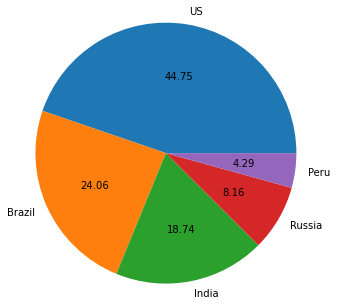

In [33]:
labels=['US','Brazil','India','Russia','Peru']
sizes=[544027944,292482604,227870813,99270602,52184232]
plt.pie(sizes,labels=labels,colors=None,radius=1.5,autopct='%.2f')
plt.show()

### Analysing the Confirmed cases in countires individually

### India

In [34]:
df10

,Country/Region,Date,Cases,Month
0,Afghanistan,2020-01-22,0,Jan
1,Albania,2020-01-22,0,Jan
2,Algeria,2020-01-22,0,Jan
3,Andorra,2020-01-22,0,Jan
4,Angola,2020-01-22,0,Jan
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,36151,Sep
64900,Western Sahara,2020-09-21,10,Sep
64901,Yemen,2020-09-21,2028,Sep
64902,Zambia,2020-09-21,14175,Sep


In [35]:
df_Ind = df10

In [36]:
df_Ind = df_Ind.loc[df_Ind['Country/Region']== 'India']

In [37]:
df_Ind

,Country/Region,Date,Cases,Month
143,India,2020-01-22,0,Jan
409,India,2020-01-23,0,Jan
675,India,2020-01-24,0,Jan
941,India,2020-01-25,0,Jan
1207,India,2020-01-26,0,Jan
...,...,...,...,...
63717,India,2020-09-17,5214677,Sep
63983,India,2020-09-18,5308014,Sep
64249,India,2020-09-19,5400619,Sep
64515,India,2020-09-20,5487580,Sep


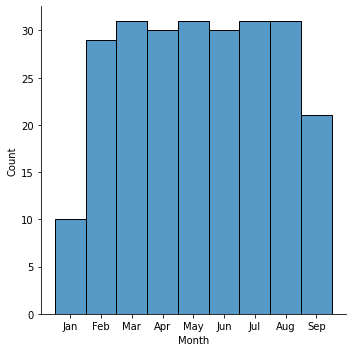

In [38]:
sns.displot(df_Ind.Month, kind='hist')

In [39]:
df_Ind = df_Ind.groupby('Month').sum()

In [40]:
df_Ind

,Cases
Month,
Apr,447607
Aug,82734792
Feb,84
Jan,2
Jul,32829678
Jun,10951713
Mar,10252
May,3088494
Sep,97808191


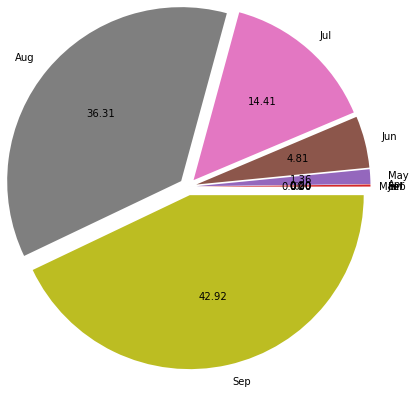

In [41]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[2,84,10252,447607,3088494,10951713,32829678,82734792,97808191]
explode=[0.1,0.1,0,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(sizes,labels=labels,colors=None,explode=explode,radius=2,autopct='%.2f')
plt.show()

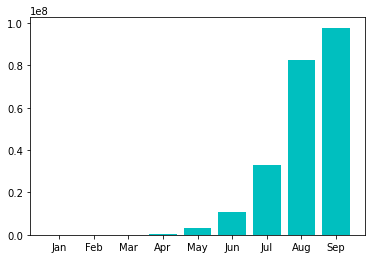

In [42]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[2,84,10252,447607,3088494,10951713,32829678,82734792,97808191]
plt.bar(labels,sizes,color='c')
plt.show()

### Brazil

In [43]:
df10

,Country/Region,Date,Cases,Month
0,Afghanistan,2020-01-22,0,Jan
1,Albania,2020-01-22,0,Jan
2,Algeria,2020-01-22,0,Jan
3,Andorra,2020-01-22,0,Jan
4,Angola,2020-01-22,0,Jan
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,36151,Sep
64900,Western Sahara,2020-09-21,10,Sep
64901,Yemen,2020-09-21,2028,Sep
64902,Zambia,2020-09-21,14175,Sep


In [44]:
df_Br = df10

In [45]:
df_Br = df_Br.loc[df_Br['Country/Region']== 'Brazil']

In [46]:
df_Br

,Country/Region,Date,Cases,Month
30,Brazil,2020-01-22,0,Jan
296,Brazil,2020-01-23,0,Jan
562,Brazil,2020-01-24,0,Jan
828,Brazil,2020-01-25,0,Jan
1094,Brazil,2020-01-26,0,Jan
...,...,...,...,...
63604,Brazil,2020-09-17,4455386,Sep
63870,Brazil,2020-09-18,4495183,Sep
64136,Brazil,2020-09-19,4528240,Sep
64402,Brazil,2020-09-20,4544629,Sep


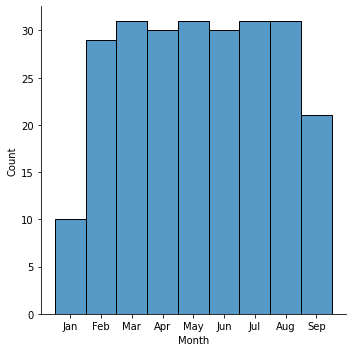

In [47]:
sns.displot(df_Br.Month, kind='hist')

In [48]:
df_Br = df_Br.groupby('Month').sum()

In [49]:
df_Br

,Cases
Month,
Apr,1048506
Aug,102903896
Feb,5
Jan,0
Jul,62641865
Jun,28161222
Mar,37127
May,7944285
Sep,89745698


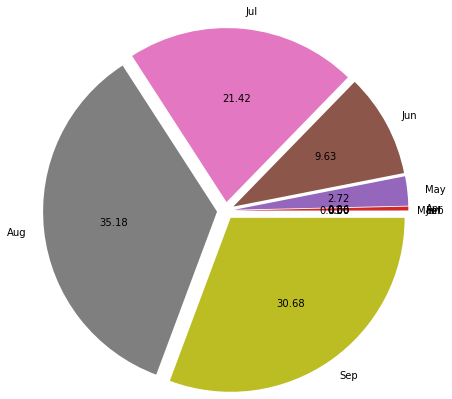

In [50]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,5,37127,1048506,7944285,28161222,62641865,102903896,89745698]
explode=[0.1,0.1,0,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(sizes,labels=labels,colors=None,explode=explode,radius=2,autopct='%.2f')
plt.show()

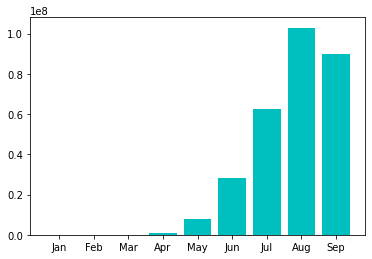

In [51]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,5,37127,1048506,7944285,28161222,62641865,102903896,89745698]
plt.bar(labels,sizes,color='c')
plt.show()

### US

In [52]:
df10

,Country/Region,Date,Cases,Month
0,Afghanistan,2020-01-22,0,Jan
1,Albania,2020-01-22,0,Jan
2,Algeria,2020-01-22,0,Jan
3,Andorra,2020-01-22,0,Jan
4,Angola,2020-01-22,0,Jan
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,36151,Sep
64900,Western Sahara,2020-09-21,10,Sep
64901,Yemen,2020-09-21,2028,Sep
64902,Zambia,2020-09-21,14175,Sep


In [53]:
df_US = df10

In [54]:
df_US = df_US.loc[df_US['Country/Region']== 'US']

In [55]:
df_US

,Country/Region,Date,Cases,Month
242,US,2020-01-22,1,Jan
508,US,2020-01-23,1,Jan
774,US,2020-01-24,2,Jan
1040,US,2020-01-25,2,Jan
1306,US,2020-01-26,5,Jan
...,...,...,...,...
63816,US,2020-09-17,6674411,Sep
64082,US,2020-09-18,6723933,Sep
64348,US,2020-09-19,6768119,Sep
64614,US,2020-09-20,6804814,Sep


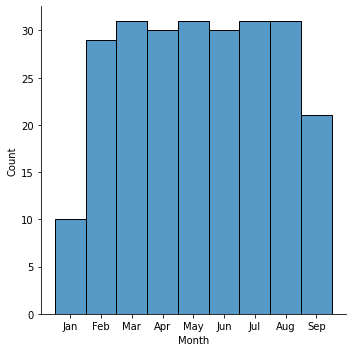

In [56]:
sns.displot(df_US.Month, kind='hist')

In [57]:
df_US = df_US.groupby('Month').sum()

In [58]:
df_US

,Cases
Month,
Apr,19553077
Aug,166350483
Feb,378
Jan,38
Jul,111200861
Jun,64933835
Mar,1085433
May,45407574
Sep,135496265


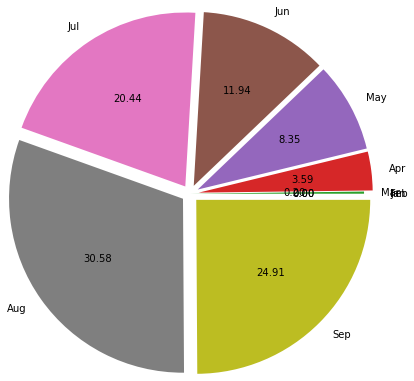

In [59]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[38,378,1085433,19553077,45407574,64933835,111200861,166350483,135496265]
explode=[0.1,0.1,0,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(sizes,labels=labels,colors=None,explode=explode,radius=2,autopct='%.2f')
plt.show()

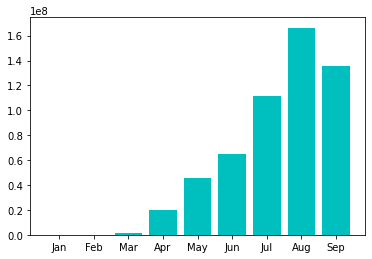

In [60]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[38,378,1085433,19553077,45407574,64933835,111200861,166350483,135496265]
plt.bar(labels,sizes,color='c')
plt.show()

### Russia

In [61]:
df10

,Country/Region,Date,Cases,Month
0,Afghanistan,2020-01-22,0,Jan
1,Albania,2020-01-22,0,Jan
2,Algeria,2020-01-22,0,Jan
3,Andorra,2020-01-22,0,Jan
4,Angola,2020-01-22,0,Jan
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,36151,Sep
64900,Western Sahara,2020-09-21,10,Sep
64901,Yemen,2020-09-21,2028,Sep
64902,Zambia,2020-09-21,14175,Sep


In [62]:
df_Rus= df10

In [63]:
df_Rus = df_Rus.loc[df_Rus['Country/Region']== 'Russia']

In [64]:
df_Rus

,Country/Region,Date,Cases,Month
208,Russia,2020-01-22,0,Jan
474,Russia,2020-01-23,0,Jan
740,Russia,2020-01-24,0,Jan
1006,Russia,2020-01-25,0,Jan
1272,Russia,2020-01-26,0,Jan
...,...,...,...,...
63782,Russia,2020-09-17,1081152,Sep
64048,Russia,2020-09-18,1086955,Sep
64314,Russia,2020-09-19,1092915,Sep
64580,Russia,2020-09-20,1098958,Sep


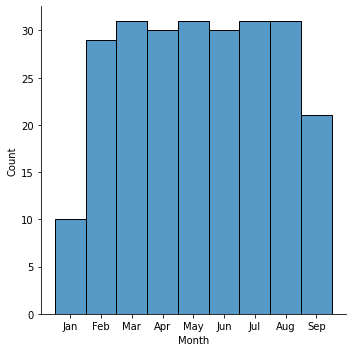

In [65]:
sns.displot(df_Rus.Month, kind='hist')

In [66]:
df_Rus = df_Rus.groupby('Month').sum()

In [67]:
df_Rus

,Cases
Month,
Apr,1129437
Aug,28508044
Feb,58
Jan,2
Jul,23233041
Jun,16097579
Mar,12224
May,8257093
Sep,22033124


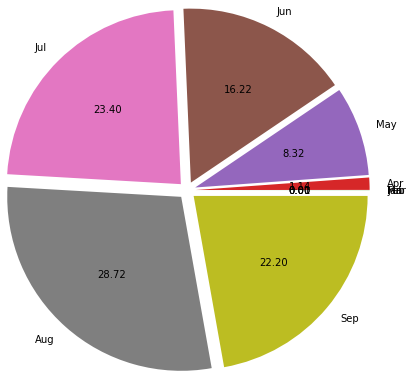

In [68]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[2,58,12224,1129437,8257093,16097579,23233041,28508044,22033124]
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(sizes,labels=labels,colors=None,explode=explode,radius=2,autopct='%.2f')
plt.show()

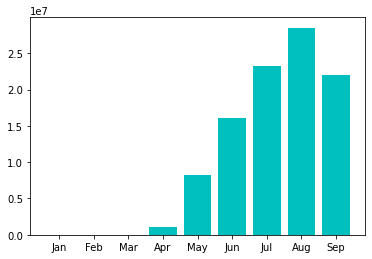

In [69]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[2,58,12224,1129437,8257093,16097579,23233041,28508044,22033124]
plt.bar(labels,sizes,color='c')
plt.show()

### Israel

In [70]:
df10

,Country/Region,Date,Cases,Month
0,Afghanistan,2020-01-22,0,Jan
1,Albania,2020-01-22,0,Jan
2,Algeria,2020-01-22,0,Jan
3,Andorra,2020-01-22,0,Jan
4,Angola,2020-01-22,0,Jan
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,36151,Sep
64900,Western Sahara,2020-09-21,10,Sep
64901,Yemen,2020-09-21,2028,Sep
64902,Zambia,2020-09-21,14175,Sep


In [71]:
df_Is = df10

In [72]:
df_Is = df_Is.loc[df_Is['Country/Region']== 'Israel']

In [73]:
df_Is

,Country/Region,Date,Cases,Month
148,Israel,2020-01-22,0,Jan
414,Israel,2020-01-23,0,Jan
680,Israel,2020-01-24,0,Jan
946,Israel,2020-01-25,0,Jan
1212,Israel,2020-01-26,0,Jan
...,...,...,...,...
63722,Israel,2020-09-17,175256,Sep
63988,Israel,2020-09-18,179071,Sep
64254,Israel,2020-09-19,183602,Sep
64520,Israel,2020-09-20,187902,Sep


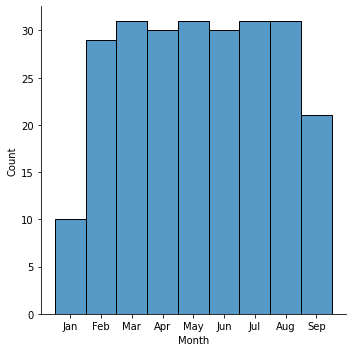

In [74]:
sns.displot(df_Is.Month, kind='hist')

In [75]:
df_Is = df_Is.groupby('Month').sum()

In [76]:
df_Is

,Cases
Month,
Apr,360925
Aug,2904596
Feb,21
Jan,0
Jul,1446396
Jun,599461
Mar,32665
May,514060
Sep,3177504


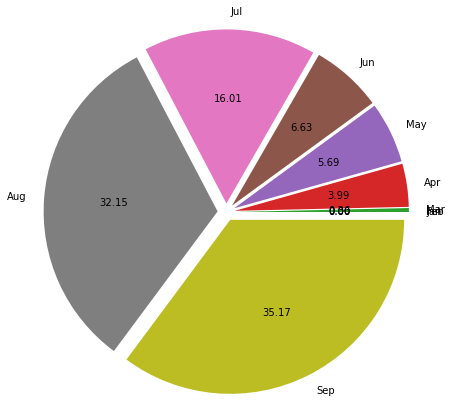

In [77]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,21,32665,360925,514060,599461,1446396,2904596,3177504]
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(sizes,labels=labels,colors=None,explode=explode,radius=2,autopct='%.2f')
plt.show()

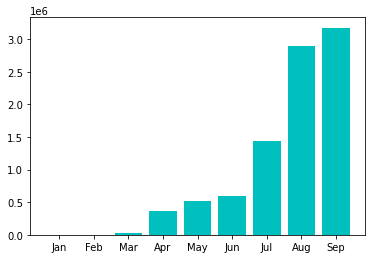

In [78]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,21,32665,360925,514060,599461,1446396,2904596,3177504]
plt.bar(labels,sizes,color='c')
plt.show()

# MODEL CREATION AND PREDICTION

## India

In [79]:
df = df.set_index('Date')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64904 entries, 2020-01-22 to 2020-09-21
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  64904 non-null  object
 1   Cases           64904 non-null  int64 
 2   Month           64904 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [81]:
df.Cases.unique()

array([     0,      1,     14, ..., 398625,  52070,  67443], dtype=int64)

In [82]:
df.head()

,Country/Region,Cases,Month
Date,,,
2020-01-22,Afghanistan,0,Jan
2020-01-22,Albania,0,Jan
2020-01-22,Algeria,0,Jan
2020-01-22,Andorra,0,Jan
2020-01-22,Angola,0,Jan


In [83]:
# check for countries having 0 cases and we may want to get rid off them
df.loc[df['Cases']==0].count()

Country/Region    10464
Cases             10464
Month             10464
dtype: int64

In [84]:
df1=df

In [85]:
# Lets first work with some sample data 
df1 = df1.loc[(df1['Cases']>0) & (df1['Country/Region']=='India')]

In [86]:
df1

,Country/Region,Cases,Month
Date,,,
2020-01-30,India,1,Jan
2020-01-31,India,1,Jan
2020-02-01,India,1,Feb
2020-02-02,India,2,Feb
2020-02-03,India,3,Feb
...,...,...,...
2020-09-17,India,5214677,Sep
2020-09-18,India,5308014,Sep
2020-09-19,India,5400619,Sep


In [87]:
#pd.set_option('display.max_rows', None)

In [88]:
df1 = df1.drop(columns='Month')

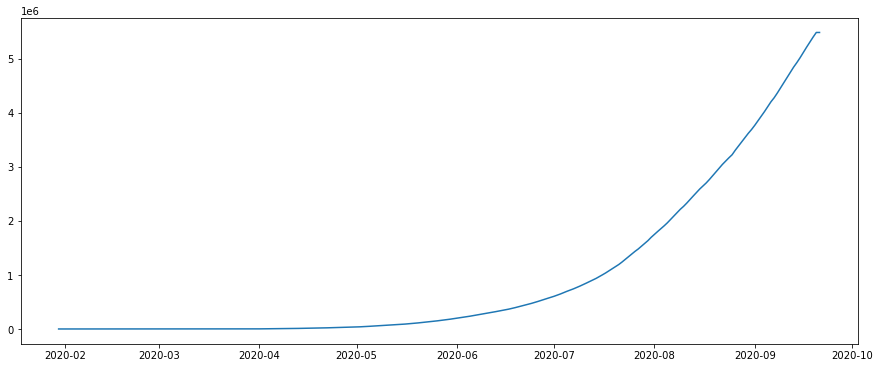

In [89]:
plt.figure(figsize=(15,6))
plt.plot(df1.drop(columns='Country/Region'))

### Stationarity

Assumptions/Criteria:
    
    1. Constant mean
    2. Constant variance
    3. Constant co-variance among different set of similar time series data.
    

In [90]:
# visualize acf - auto correlation factor
from statsmodels.graphics.tsaplots import plot_acf

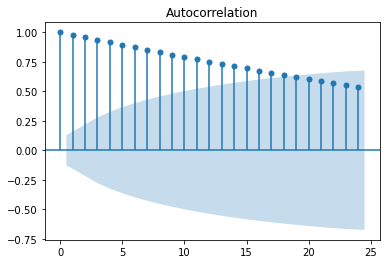

In [91]:
plot_acf(df1.drop(columns='Country/Region'));

In [92]:
df1 = df1.drop(columns='Country/Region')

In [93]:
df2=df1.diff(periods=1)

In [94]:
df2

,Cases
Date,
2020-01-30,NaN
2020-01-31,0.0
2020-02-01,0.0
2020-02-02,1.0
2020-02-03,1.0
...,...
2020-09-17,96424.0
2020-09-18,93337.0
2020-09-19,92605.0


In [95]:
df2 = df2.iloc[ 1: , ]

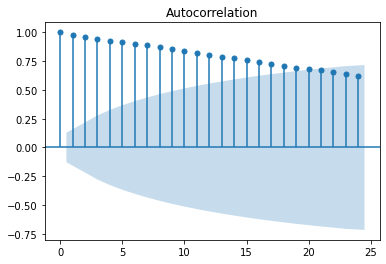

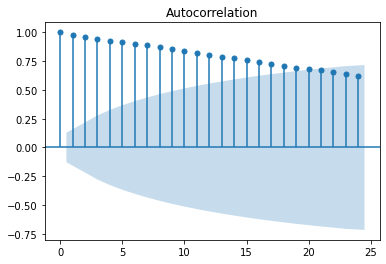

In [96]:
plot_acf(df2)

In [97]:
df3 = df2.diff(periods=2)

In [98]:
df3

,Cases
Date,
2020-01-31,NaN
2020-02-01,NaN
2020-02-02,1.0
2020-02-03,1.0
2020-02-04,-1.0
...,...
2020-09-17,6301.0
2020-09-18,-4557.0
2020-09-19,-3819.0


In [99]:
df3 = df3.iloc[ 2: , ]

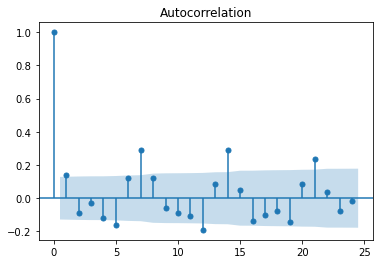

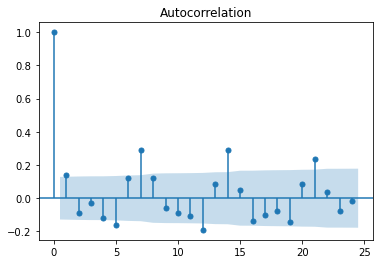

In [100]:
plot_acf(df3) #now the data converted to stationary

### AR Model

In [101]:
## Creating training and test sets
train=df3[:202]
test=df3[202:]

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 202 entries, 2020-02-02 to 2020-08-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cases   202 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [103]:
df3.shape

(233, 1)

In [104]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
## Applying autoregressive model
from statsmodels.tsa.ar_model import AR

In [106]:
## model creation
ar_model=AR(train) ## object creation
ar_model_fit=ar_model.fit()

In [107]:
##making prediction
prediction=ar_model_fit.predict(start=202,end=233)

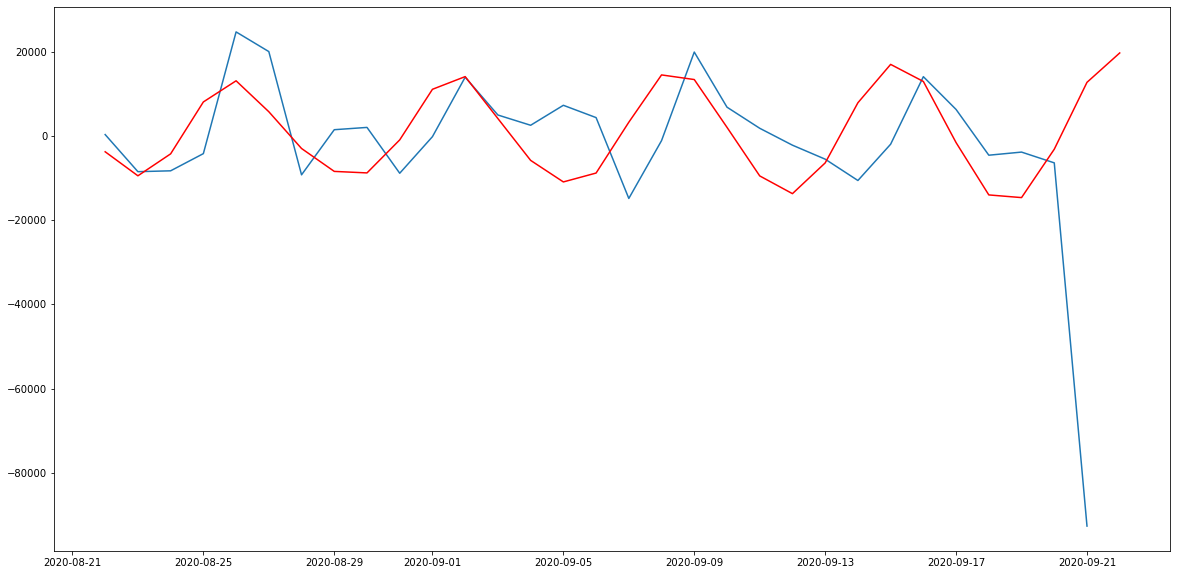

In [108]:
plt.figure(figsize=(20,10))
plt.plot(test)
plt.plot(prediction,color='red') #the test and prediction graph slightly differ lets apply ARIMA model

### ARIMA Model

In [109]:
## importing the library
from statsmodels.tsa.arima_model import ARIMA

In [110]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))# order(p,d,q)

model_arima_fit = model_arima.fit()

In [111]:
## evaluate the model
print(model_arima_fit.aic)

3814.9683580915244


In [112]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=30)[0]

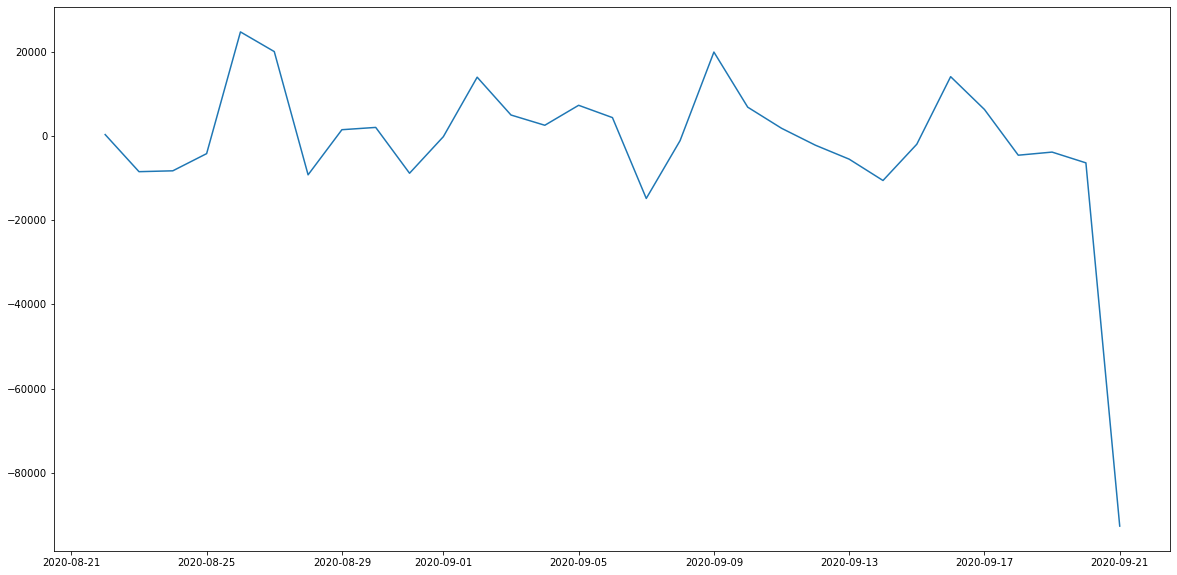

In [113]:
## plotting the test data
plt.figure(figsize=(20,10))
plt.plot(test)


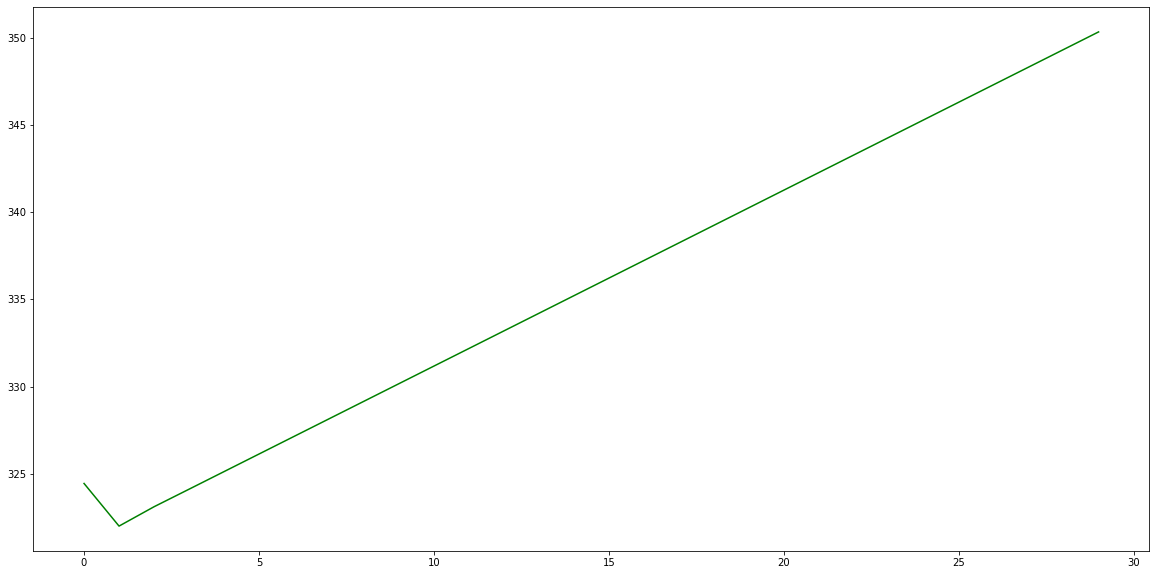

In [114]:
## plotting the forecasted values
plt.figure(figsize=(20,10))
plt.plot(predictions,color='green') #graphs are not identical so we can go for tuning

In [115]:
## Geeting the optimal values of p,d and q
import itertools

p =d= q=range(0,6)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [116]:


for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 3775.6688515675405
(0, 0, 1) 3648.0798337739725
(0, 0, 2) 3649.6820983347334
(0, 0, 3) 3626.0002585985712
(0, 0, 4) 3626.147492484473
(0, 0, 5) 3624.385127888691
(0, 1, 0) 3813.136305723814
(0, 1, 1) 3751.908122478616
(0, 1, 2) 3630.5216116512584
(0, 1, 3) 3630.547408963208
(0, 1, 4) 3585.9254202523844
(0, 1, 5) 3587.6304743713163
(0, 2, 0) 3938.66760071928
(0, 2, 1) 3802.48413180255
(0, 2, 2) 3763.4172747422353
(0, 2, 3) nan
(0, 2, 4) nan
(0, 2, 5) 3580.240218648175
(1, 0, 0) 3752.6629316609815
(1, 0, 1) 3649.902760181881
(1, 0, 5) 3600.3402792789943
(1, 1, 0) 3814.9683580915244
(1, 1, 1) 3734.855762458459
(1, 2, 0) 3925.0773800459892
(2, 0, 0) 3709.6549893443703
(2, 0, 1) 3635.4440349844986
(2, 0, 2) 3635.630911640191
(2, 1, 0) 3751.4119323384175
(2, 1, 1) 3681.160591589609
(2, 1, 3) 3592.865957632477
(2, 2, 0) 3818.3382081181726
(2, 2, 1) 3741.9397246155186
(3, 0, 0) 3710.2473760113735
(3, 0, 1) 3637.1002828482906
(3, 1, 0) 3752.2290711350934
(3, 1, 1) 3683.146974714946
(3

In [117]:
## creating the final model with lowest aic score parameter


In [118]:
model_arima = ARIMA(train, order=(5,1,2))# order(p,d,q)

model_arima_fit = model_arima.fit()

In [119]:
print(model_arima_fit.aic)

3531.1638161029687


In [120]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=30)[0]

In [121]:
predictions

array([-3904.98778679, -9364.05715418,  -251.03454397,  8910.53452822,
        6674.25045617,  4023.5654065 ,  -365.5823779 , -6609.26931021,
       -3532.75198342,  3615.9768947 ,  5583.36424283,  5522.9661672 ,
        2668.11951092, -3095.14937022, -3884.59810238,   120.66206245,
        3193.55378293,  5048.90541799,  4278.21317492,    61.27147921,
       -2507.95627976, -1351.68741012,  1006.63738464,  3529.38776669,
        4436.64341558,  2170.1186546 ,  -565.65448013, -1263.28731059,
        -262.92836512,  1882.53829935])

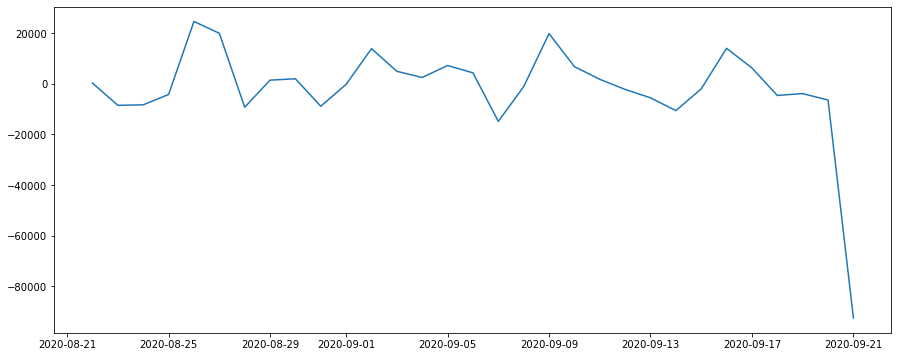

In [122]:
plt.figure(figsize=(15,6))
plt.plot(test)

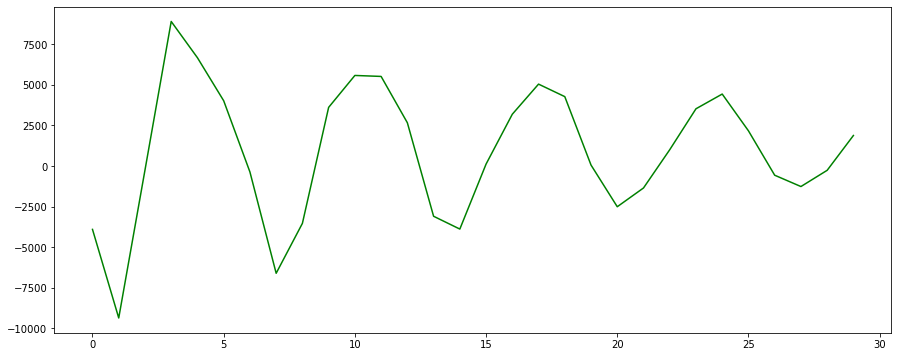

In [123]:
plt.figure(figsize=(15,6))
plt.plot(predictions,color='green')

# Brazil

In [124]:
B1=df

In [125]:
# Lets first work with some sample data 
B1 = B1.loc[(B1['Cases']>0) & (B1['Country/Region']=='Brazil')]

In [126]:
B1

,Country/Region,Cases,Month
Date,,,
2020-02-26,Brazil,1,Feb
2020-02-27,Brazil,1,Feb
2020-02-28,Brazil,1,Feb
2020-02-29,Brazil,2,Feb
2020-03-01,Brazil,2,Mar
...,...,...,...
2020-09-17,Brazil,4455386,Sep
2020-09-18,Brazil,4495183,Sep
2020-09-19,Brazil,4528240,Sep


In [127]:
B1 = B1.drop(columns='Month')

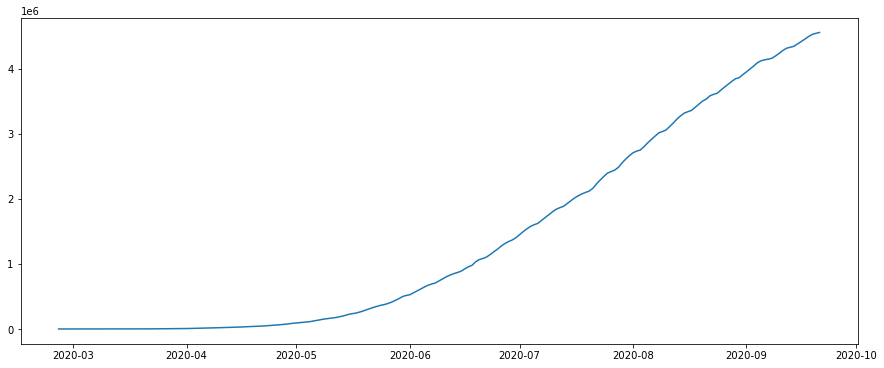

In [128]:
plt.figure(figsize=(15,6))
plt.plot(B1.drop(columns='Country/Region'))

### Stationarity

In [129]:
# visualize acf - auto correlation factor
from statsmodels.graphics.tsaplots import plot_acf

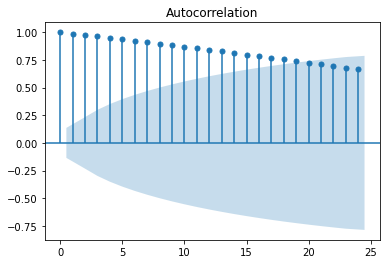

In [130]:
plot_acf(B1.drop(columns='Country/Region'));

In [131]:
B1= B1.drop(columns='Country/Region')

In [132]:
B2 = B1.diff(periods=1)

In [133]:
B2

,Cases
Date,
2020-02-26,NaN
2020-02-27,0.0
2020-02-28,0.0
2020-02-29,1.0
2020-03-01,0.0
...,...
2020-09-17,36303.0
2020-09-18,39797.0
2020-09-19,33057.0


In [134]:
B2 = B2.iloc[ 1:,]

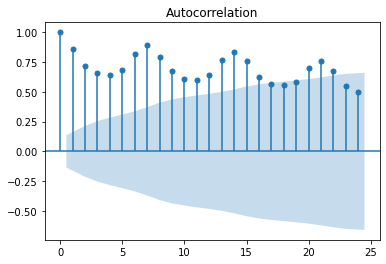

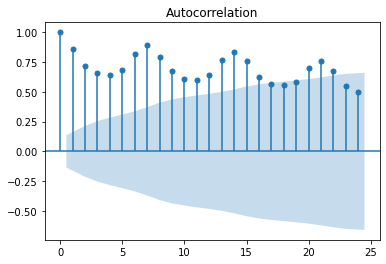

In [135]:
plot_acf(B2)

In [136]:
B3 = B2.diff(periods=2)

In [137]:
B3 = B3.iloc[ 2:,]

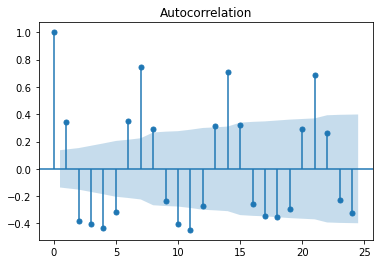

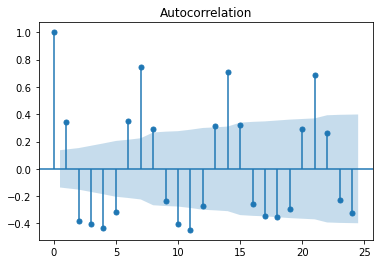

In [138]:
plot_acf(B3) #now the data converted to stationary

### AR Model

In [139]:
## Creating training and test sets
train=B3[:180]
test=B3[180:]

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2020-02-29 to 2020-08-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cases   180 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [141]:
B3.shape

(206, 1)

In [142]:
## Applying autoregressive model
from statsmodels.tsa.ar_model import AR
## model creation
ar_model=AR(train) ## object creation
ar_model_fit=ar_model.fit()

In [143]:
##making prediction
prediction=ar_model_fit.predict(start=180,end=206)

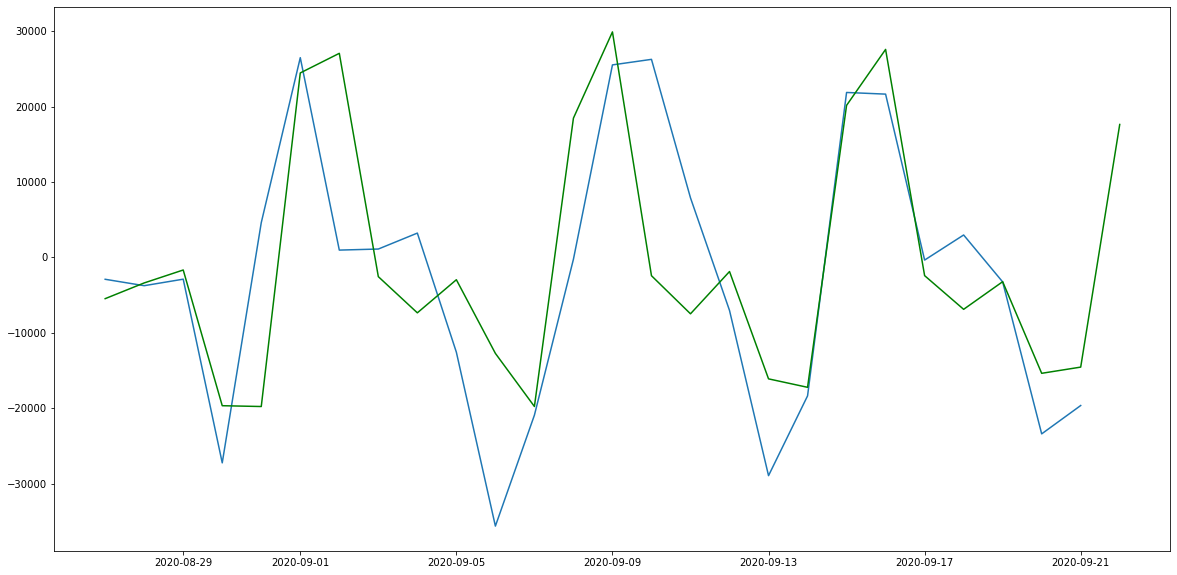

In [144]:
plt.figure(figsize=(20,10))
plt.plot(test)
plt.plot(prediction,color='green')  #the test and prediction graph slightly differ lets apply ARIMA model

### ARIMA

In [145]:
## importing the library
from statsmodels.tsa.arima_model import ARIMA

In [146]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))# order(p,d,q)

model_arima_fit = model_arima.fit()

In [147]:
## evaluate the model
print(model_arima_fit.aic)

3969.089433466923


In [148]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=30)[0]

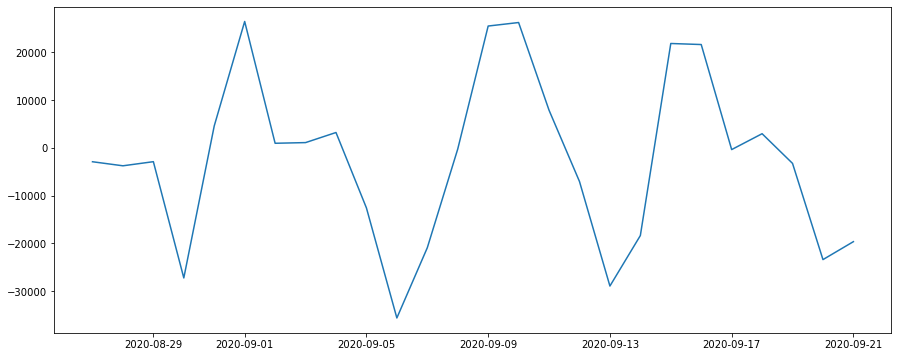

In [149]:
## plotting the test data
plt.figure(figsize=(15,6))
plt.plot(test)


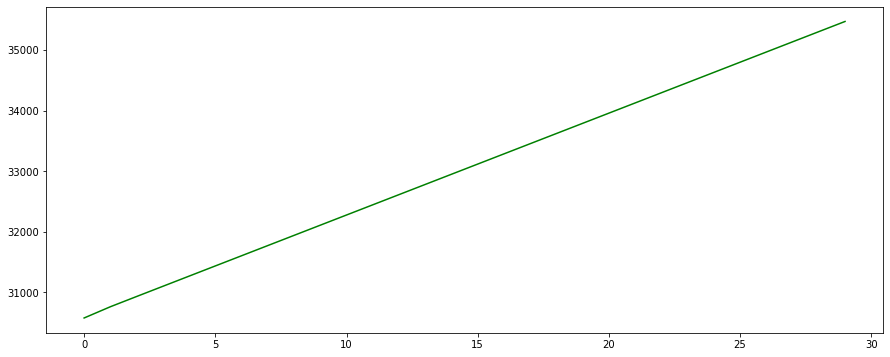

In [150]:
## plotting the forecasted values
plt.figure(figsize=(15,6))
plt.plot(predictions,color='green')#graphs are not identical so we can go for tuning

In [151]:
## Geeting the optimal values of p,d and q
import itertools

p =d= q=range(0,6)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [152]:
for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 3939.0478029362857
(0, 0, 1) 3820.4967532810037
(0, 0, 2) 3808.4478632729315
(0, 0, 3) 3753.6836602259527
(0, 0, 4) 3755.5529831194763
(0, 1, 0) 3967.588396629743
(0, 1, 1) 3923.3945929596994
(0, 1, 2) nan
(0, 1, 3) 3808.1172567875665
(0, 1, 4) 3736.6444633705614
(0, 2, 0) 4060.067549513597
(0, 2, 1) 3953.571343616488
(0, 2, 2) 3908.3412747717416
(0, 2, 3) nan
(0, 2, 4) nan
(0, 2, 5) 3729.8456785418834
(1, 0, 0) 3920.1254540930495
(1, 0, 3) 3755.6053212499596
(1, 0, 4) 3746.2991903878324
(1, 1, 0) 3969.089433466923
(1, 1, 1) 3905.711455284098
(1, 2, 0) 4054.9095790407227
(2, 0, 0) 3847.506771525176
(2, 0, 1) 3800.94129223955
(2, 0, 2) 3745.565448510155
(2, 0, 3) 3715.583713826787
(2, 1, 0) 3905.8871482137156
(2, 1, 1) 3834.488894426182
(2, 1, 3) 3729.280801252855
(2, 2, 0) 3951.960235278326
(3, 0, 0) 3849.5062593111643
(3, 0, 1) 3802.851316851288
(3, 1, 0) 3904.8414747295665
(3, 1, 1) 3836.4828373322207
(3, 1, 3) 3728.499433033323
(3, 2, 0) 3952.4565122092067
(4, 0, 0) 3698.1

In [153]:
## create the final model with lowest aic score parameter

In [154]:
model_arima = ARIMA(train, order=(4,0,5))# order(p,d,q)

model_arima_fit = model_arima.fit()

In [155]:
print(model_arima_fit.aic)

3641.569557536194


In [156]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=30)[0]

In [157]:
predictions

array([ -8160.20226886,  -4064.92953676,  -1024.87714722, -17053.1755138 ,
       -10692.21619304,  15388.96651986,  18680.54730828,   3756.75159734,
        -3495.10088229,  -8057.73519442, -13392.63149346,  -5314.64412153,
        11102.67865295,  15357.11573703,   6602.85261059,  -3132.73007067,
       -10039.19110517, -11565.43738963,  -3125.35551075,   9321.18418759,
        13515.76817139,   7144.49520692,  -2917.23070404, -10250.62748639,
       -10380.82867292,  -2121.30370239,   8413.36456031,  12276.05479523,
         6916.94763014,  -2776.89983358])

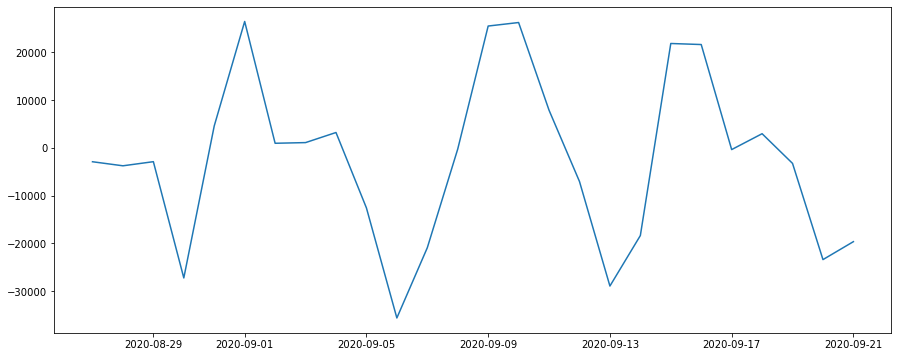

In [158]:
plt.figure(figsize=(15,6))
plt.plot(test)

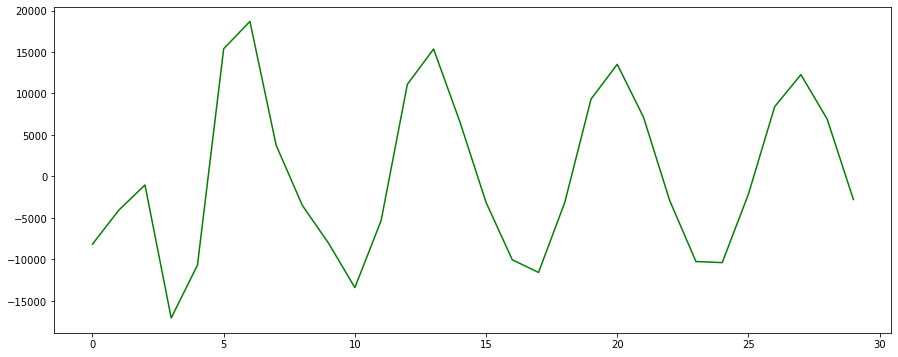

In [159]:
plt.figure(figsize=(15,6))
plt.plot(predictions,color='green')# test and prediction graph are different

# US

In [160]:
U1=df

In [161]:
# Lets first work with some sample data 
U1 = U1.loc[(U1['Cases']>0) & (U1['Country/Region']=='US')]

In [162]:
U1

,Country/Region,Cases,Month
Date,,,
2020-01-22,US,1,Jan
2020-01-23,US,1,Jan
2020-01-24,US,2,Jan
2020-01-25,US,2,Jan
2020-01-26,US,5,Jan
...,...,...,...
2020-09-17,US,6674411,Sep
2020-09-18,US,6723933,Sep
2020-09-19,US,6768119,Sep


In [163]:
U1 = U1.drop(columns='Month')

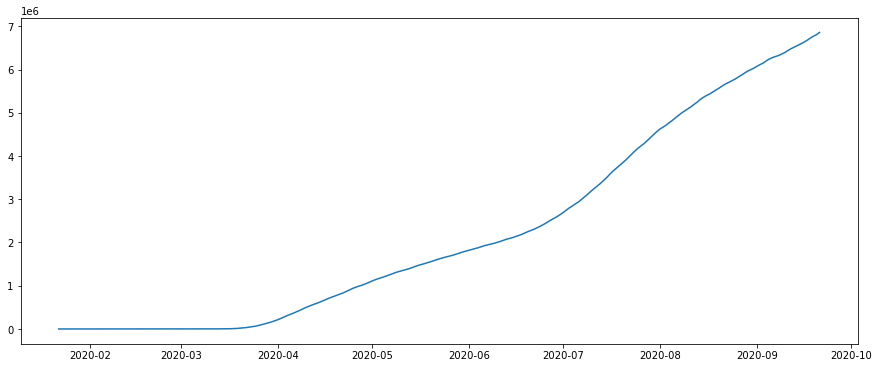

In [164]:
plt.figure(figsize=(15,6))
plt.plot(U1.drop(columns='Country/Region'))

### Stationarity

In [165]:
# visualize acf - auto correlation factor
from statsmodels.graphics.tsaplots import plot_acf

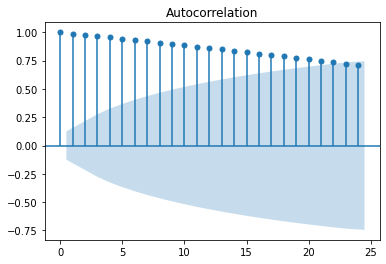

In [166]:
plot_acf(U1.drop(columns='Country/Region'));

In [167]:
U1= U1.drop(columns='Country/Region')

In [168]:
## making it stationary by taking difference of 1
U2=U1.diff(periods=1)

In [169]:
U2

,Cases
Date,
2020-01-22,NaN
2020-01-23,0.0
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,3.0
...,...
2020-09-17,44360.0
2020-09-18,49522.0
2020-09-19,44186.0


In [170]:
U2 = U2.iloc[ 1:,]

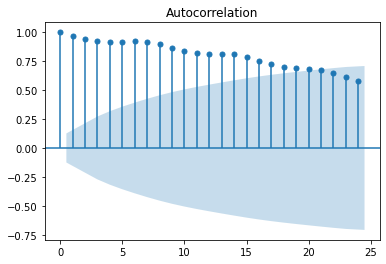

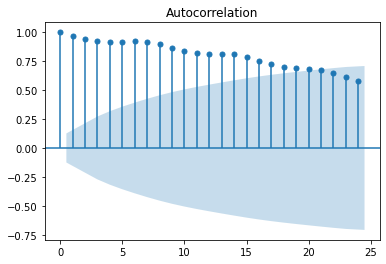

In [171]:
plot_acf(U2)

In [172]:
U3=U2.diff(periods=2)

In [173]:
U3

,Cases
Date,
2020-01-23,NaN
2020-01-24,NaN
2020-01-25,0.0
2020-01-26,2.0
2020-01-27,0.0
...,...
2020-09-17,5670.0
2020-09-18,11813.0
2020-09-19,-174.0


In [174]:
U3 = U3.iloc[ 2:,]

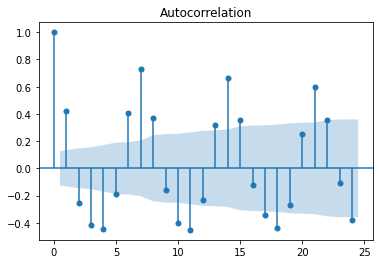

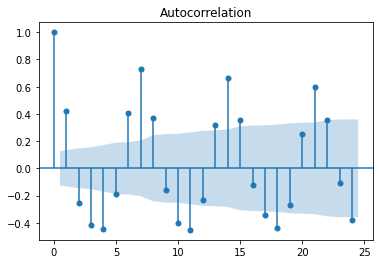

In [175]:
plot_acf(U3)

### AR Model

In [176]:
U3.shape

(241, 1)

In [177]:
## Creating training and test sets
train=U3[:205]
test=U3[205:]

In [178]:
## Applying autoregressive model
from statsmodels.tsa.ar_model import AR


In [179]:
## model creation
ar_model=AR(train) ## object creation
ar_model_fit=ar_model.fit()

In [180]:
##making prediction
prediction=ar_model_fit.predict(start=205,end=241)

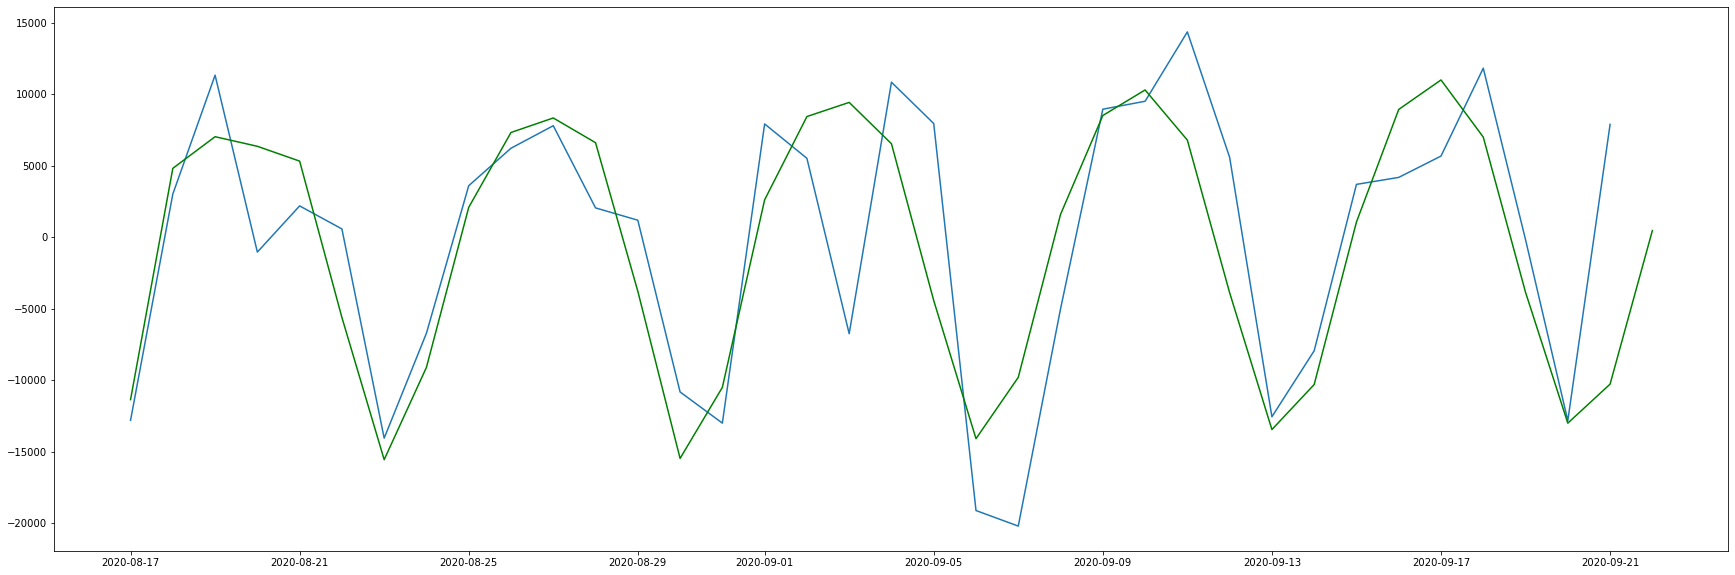

In [181]:
plt.figure(figsize=(30,10))
plt.plot(test)
plt.plot(prediction,color='green')#the test and prediction graph slightly differ lets apply ARIMA model

# ARIMA

In [182]:
## importing the library
from statsmodels.tsa.arima_model import ARIMA

In [183]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))# order(p,d,q)

model_arima_fit = model_arima.fit()

In [184]:
## evaluate the model
print(model_arima_fit.aic)

4086.6451444053214


In [185]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=30)[0]

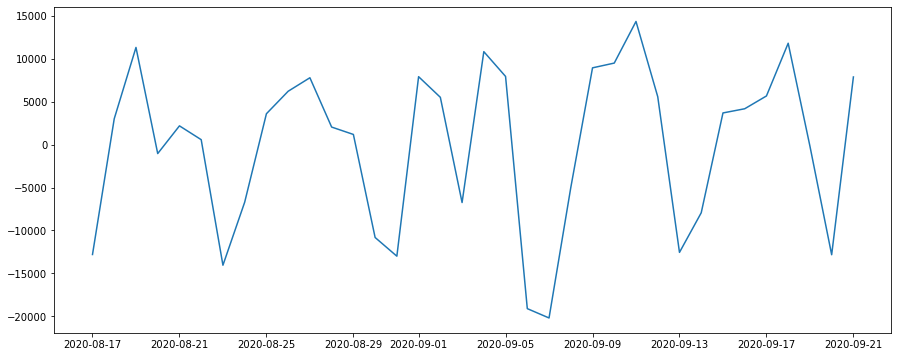

In [186]:
## plotting the test data
plt.figure(figsize=(15,6))
plt.plot(test)


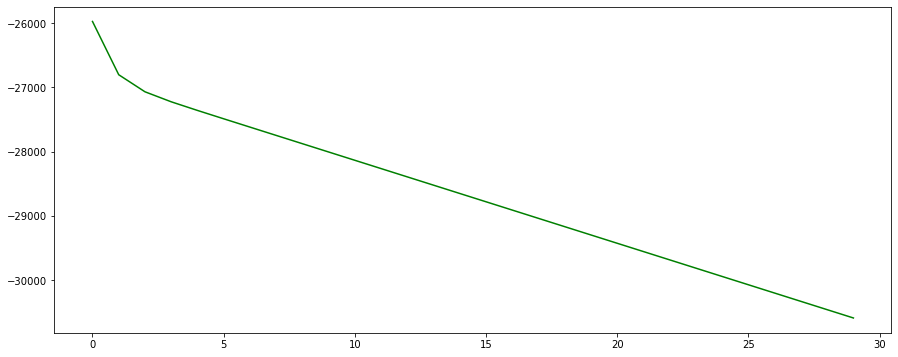

In [187]:
## plotting the forecasted values
plt.figure(figsize=(15,6))
plt.plot(predictions,color='green')#graphs are not identical so we can go for tuning

In [188]:
## Geeting the optimal values of p,d and q
import itertools

p =d= q=range(0,6)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [189]:
for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 4111.833908384098
(0, 0, 1) 3982.092286776853
(0, 0, 2) 3982.9526818583436
(0, 0, 3) 3979.575258210019
(0, 0, 4) 3971.157603339736
(0, 0, 5) nan
(0, 1, 0) 4092.107121036943
(0, 1, 1) 4064.4204837608627
(0, 1, 2) 3972.8673833612174
(0, 1, 3) 3970.249434647993
(0, 1, 4) 3959.657512054611
(0, 2, 0) 4165.141019669816
(0, 2, 1) 4080.1155355688475
(0, 2, 2) 4051.681944546408
(0, 2, 3) 3964.147797274271
(0, 2, 4) 3971.3288382484434
(0, 2, 5) 3951.971789269719
(1, 0, 0) 4060.458285756483
(1, 0, 1) 3983.274512438427
(1, 0, 2) 3980.6357332786342
(1, 0, 3) 3974.9485776920446
(1, 0, 4) 3972.1465648401004
(1, 0, 5) 3946.234080516394
(1, 1, 0) 4086.6451444053214
(1, 1, 1) 4047.3963917134015
(1, 1, 3) 3960.612863581901
(1, 1, 4) 3951.1983753683335
(1, 1, 5) 3946.504102147948
(1, 2, 0) 4162.112704946917
(1, 2, 5) 3959.0226454484987
(2, 0, 0) 3982.201826335057
(2, 0, 1) 3977.7296366234073
(2, 0, 2) 3964.8907365269015
(2, 0, 3) 3884.069430657522
(2, 0, 4) 3902.1000806115685
(2, 0, 5) 3883.1547

In [190]:
## create the final model with lowest aic score parameter

In [191]:
model_arima = ARIMA(train, order=(5,2,2))# order(p,d,q)

model_arima_fit = model_arima.fit()

In [192]:
print(model_arima_fit.aic)

3853.285101055329


In [193]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=30)[0]

In [194]:
predictions

array([-12587.01217937,   2137.09977984,   4667.07136592,   7964.42511434,
         6210.65963776,  -8412.71147578, -16575.14492738, -10169.68670755,
        -2191.32908626,   3953.3671118 ,   8137.02912543,   2770.55064934,
        -8540.64922216, -13338.86858455, -10161.51732668,  -3738.64570174,
         3532.14915075,   6283.88179372,    649.51435998,  -7807.03661237,
       -11901.87031167, -10224.74996976,  -4187.77786893,   2514.28813124,
         4197.54407008,   -584.75342232,  -7353.3468954 , -11233.19558683,
       -10023.66272172,  -4492.90151261])

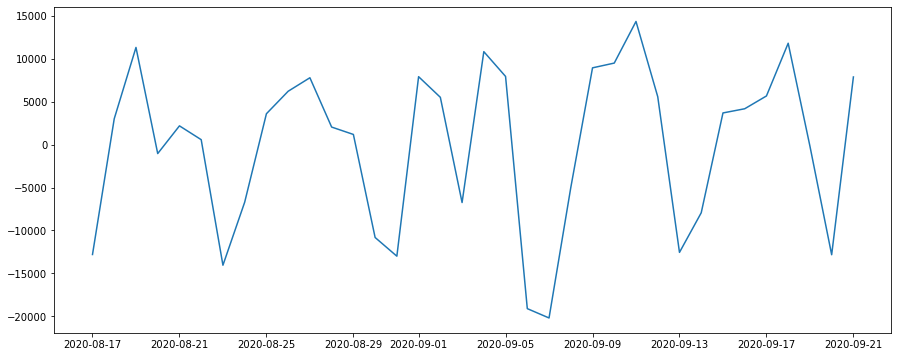

In [195]:
plt.figure(figsize=(15,6))
plt.plot(test)

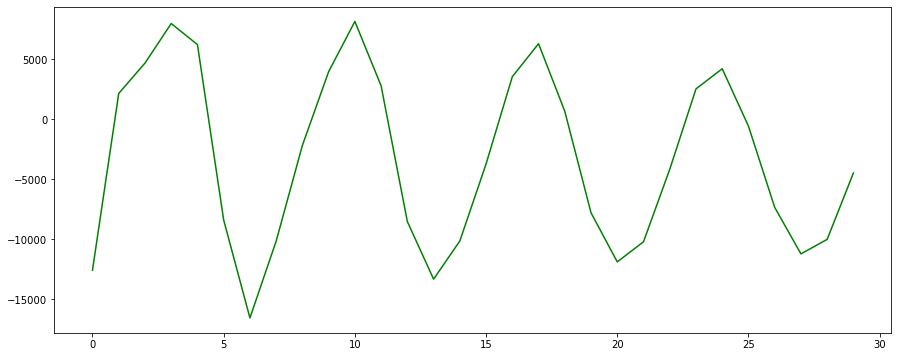

In [196]:
plt.figure(figsize=(15,6))
plt.plot(predictions,color='green')#the graph are not identical

# Russia

In [197]:
R1=df

In [198]:
# Lets first work with some sample data 
R1 = R1.loc[(R1['Cases']>0) & (R1['Country/Region']=='Russia')]

In [199]:
R1

,Country/Region,Cases,Month
Date,,,
2020-01-31,Russia,2,Jan
2020-02-01,Russia,2,Feb
2020-02-02,Russia,2,Feb
2020-02-03,Russia,2,Feb
2020-02-04,Russia,2,Feb
...,...,...,...
2020-09-17,Russia,1081152,Sep
2020-09-18,Russia,1086955,Sep
2020-09-19,Russia,1092915,Sep


In [200]:
R1 = R1.drop(columns='Month')

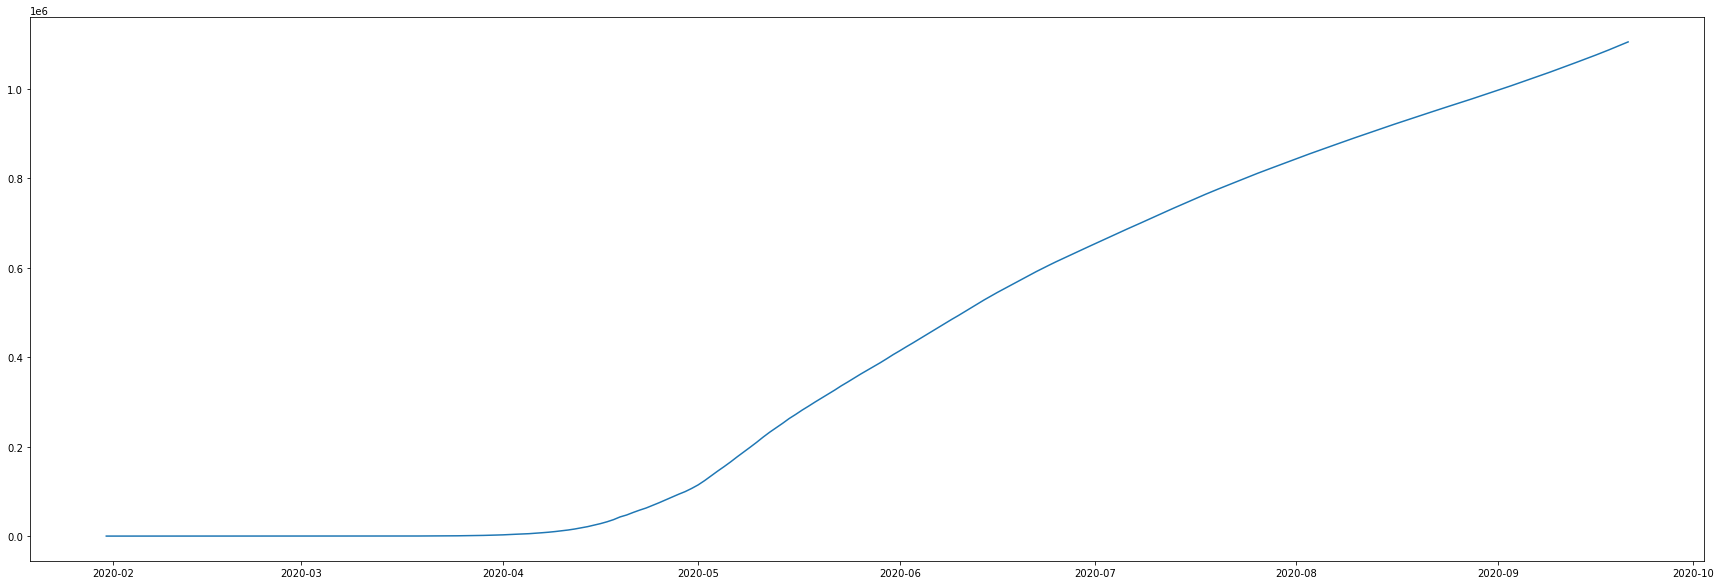

In [201]:
plt.figure(figsize=(30,10))
plt.plot(R1.drop(columns='Country/Region'))

### Stationarity

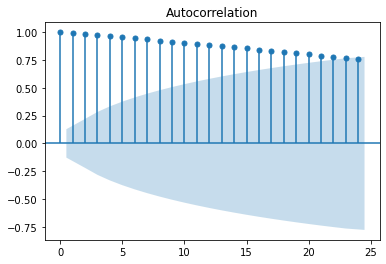

In [202]:
# visualize acf - auto correlation factor
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(R1.drop(columns='Country/Region'));

In [203]:
R1= R1.drop(columns='Country/Region')

In [204]:
## making it stationary by taking difference of 1
R2=R1.diff(periods=1)

In [205]:
R2

,Cases
Date,
2020-01-31,NaN
2020-02-01,0.0
2020-02-02,0.0
2020-02-03,0.0
2020-02-04,0.0
...,...
2020-09-17,5667.0
2020-09-18,5803.0
2020-09-19,5960.0


In [206]:
R2 = R2.iloc[ 1:,]

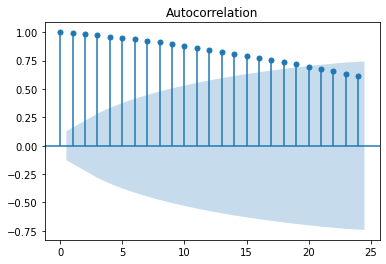

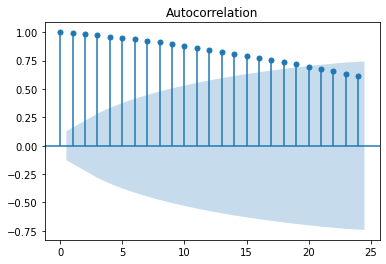

In [207]:
plot_acf(R2)

In [208]:
R3=R2.diff(periods=2)

In [209]:
R3

,Cases
Date,
2020-02-01,NaN
2020-02-02,NaN
2020-02-03,0.0
2020-02-04,0.0
2020-02-05,0.0
...,...
2020-09-17,232.0
2020-09-18,191.0
2020-09-19,293.0


In [210]:
R3 = R3.iloc[ 2:,]

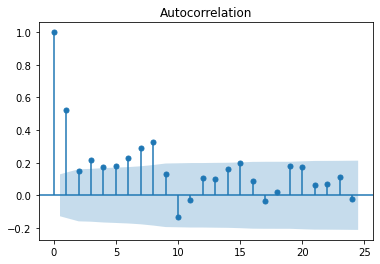

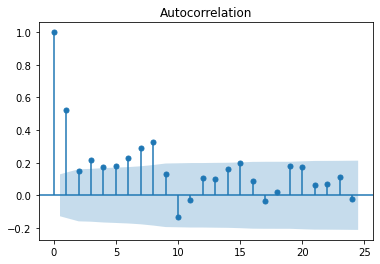

In [211]:
plot_acf(R3)

In [212]:
R4=R3.diff(periods=3)

In [213]:
R4

,Cases
Date,
2020-02-03,NaN
2020-02-04,NaN
2020-02-05,NaN
2020-02-06,0.0
2020-02-07,0.0
...,...
2020-09-17,224.0
2020-09-18,117.0
2020-09-19,95.0


In [214]:
R4 = R4.iloc[ 3:,]

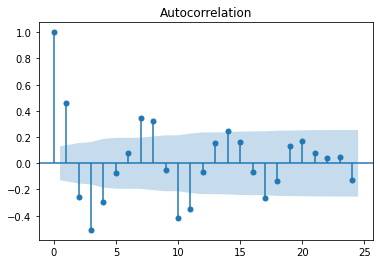

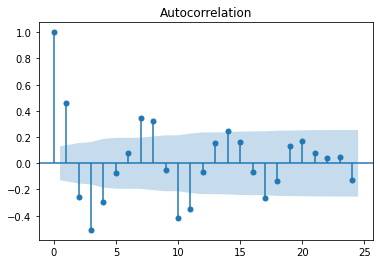

In [215]:
plot_acf(R4)

# AR model

In [216]:
R4.shape

(229, 1)

In [217]:
## Creating training and test sets
train=R4[:195]
test=R4[195:]

In [218]:
## Applying autoregressive model
from statsmodels.tsa.ar_model import AR

In [219]:
## model creation
ar_model=AR(train) ## object creation
ar_model_fit=ar_model.fit()

In [220]:
##making prediction
prediction=ar_model_fit.predict(start=195,end=229)

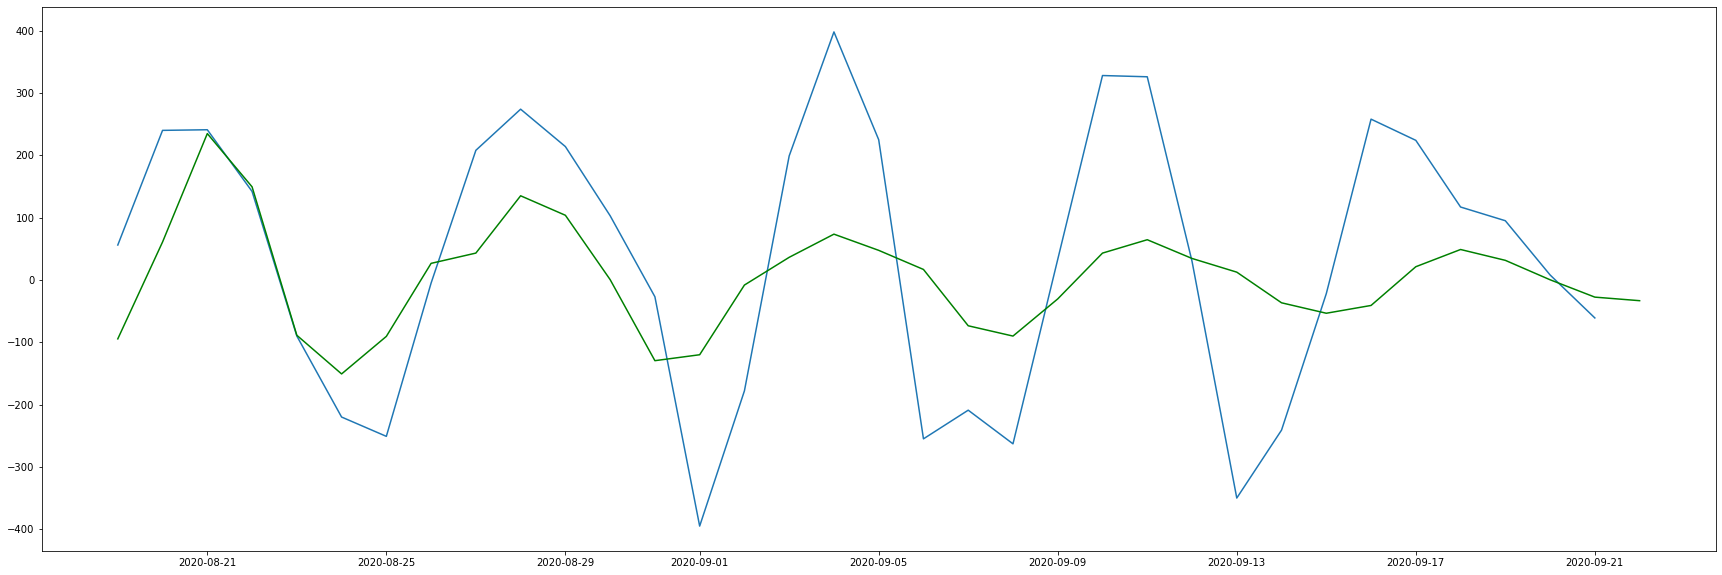

In [221]:
plt.figure(figsize=(30,10))
plt.plot(test)
plt.plot(prediction,color='green')#the test and prediction graphs are different lets apply ARIMA model

# ARIMA

In [222]:
## importing the library
from statsmodels.tsa.arima_model import ARIMA

In [223]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))# order(p,d,q)

model_arima_fit = model_arima.fit()

In [224]:
## evaluate the model
print(model_arima_fit.aic)


3061.5946257719215


In [225]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=30)[0]

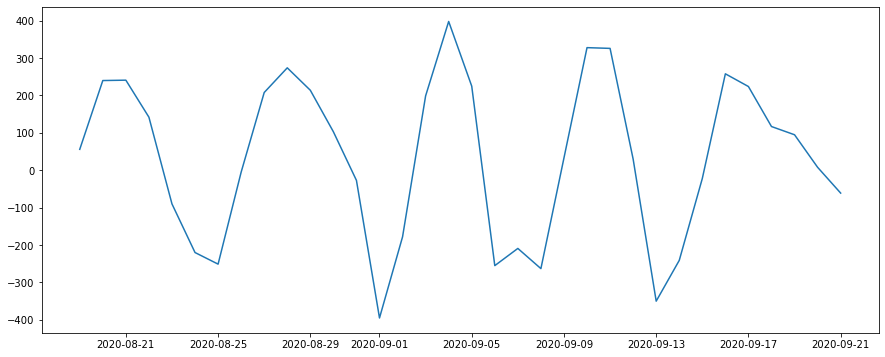

In [226]:
## plotting the test data
plt.figure(figsize=(15,6))
plt.plot(test)

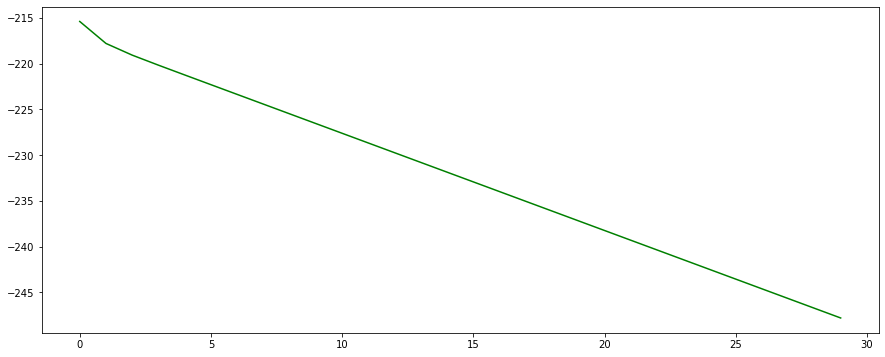

In [227]:
## plotting the forecasted values
plt.figure(figsize=(15,6))
plt.plot(predictions,color='green')#graphs are not identical so we can go for tuning

In [228]:
## Geeting the optimal values of p,d and q
import itertools

p =d= q=range(0,6)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [229]:

for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 3063.766118240032
(0, 0, 1) 2978.454972909921
(0, 0, 2) 2967.7525488496494
(0, 0, 3) 2953.0227246480736
(0, 0, 4) 2887.43281160232
(0, 0, 5) 2881.3752024239056
(0, 1, 0) 3064.691272683977
(0, 1, 1) 3052.4184753359523
(0, 1, 2) 2970.4113463200174
(0, 1, 3) 2959.0407666977253
(0, 1, 4) 2950.6909906794317
(0, 1, 5) 2882.618515418858
(0, 2, 0) 3149.7059536682928
(0, 2, 1) 3057.17828127474
(0, 2, 2) 3044.3866224257063
(0, 2, 3) 2996.4098490326533
(0, 2, 4) nan
(0, 2, 5) nan
(1, 0, 0) 3020.10870110371
(1, 0, 1) 2978.7639221280397
(1, 0, 2) 2959.7094737536145
(1, 0, 3) 2930.7416693901096
(1, 0, 4) 2880.2552495316604
(1, 0, 5) 2881.9941925938765
(1, 1, 0) 3061.5946257719215
(1, 1, 1) 3011.688336265439
(1, 1, 2) 2970.5249205605924
(1, 1, 5) 2874.884211149886
(1, 2, 0) 3147.7551355466458
(2, 0, 0) 2938.36678964592
(2, 0, 1) 2938.0613148051543
(2, 0, 2) 2936.647160724642
(2, 0, 3) 2916.0291671983723
(2, 0, 5) 2881.475989424088
(2, 1, 0) 3014.202743757707
(2, 1, 1) 2931.276682798026
(2, 

In [230]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(1,0,4))# order(p,d,q)


In [231]:
model_arima_fit = model_arima.fit()

print(model_arima_fit.aic)

2880.2552495316604


In [232]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=30)[0]

In [233]:
predictions

array([ 21.16267613, 144.26635827,  62.50069989,  -9.37879945,
         0.52969773,  -1.99624016,  -1.35231181,  -1.51646617,
        -1.47461889,  -1.48528687,  -1.48256732,  -1.4832606 ,
        -1.48308387,  -1.48312892,  -1.48311744,  -1.48312036,
        -1.48311962,  -1.48311981,  -1.48311976,  -1.48311977,
        -1.48311977,  -1.48311977,  -1.48311977,  -1.48311977,
        -1.48311977,  -1.48311977,  -1.48311977,  -1.48311977,
        -1.48311977,  -1.48311977])

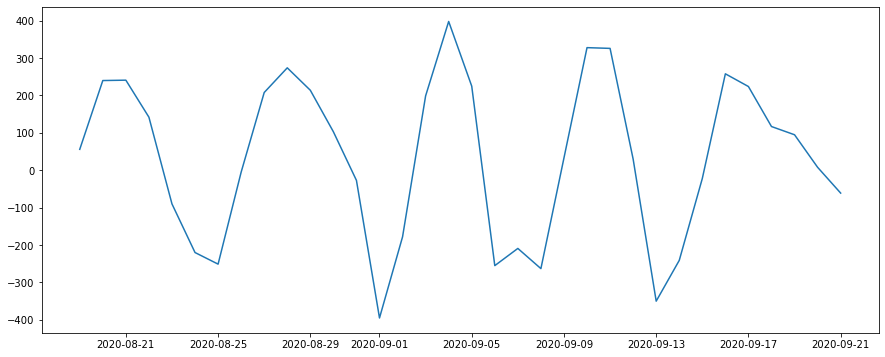

In [234]:
plt.figure(figsize=(15,6))
plt.plot(test)

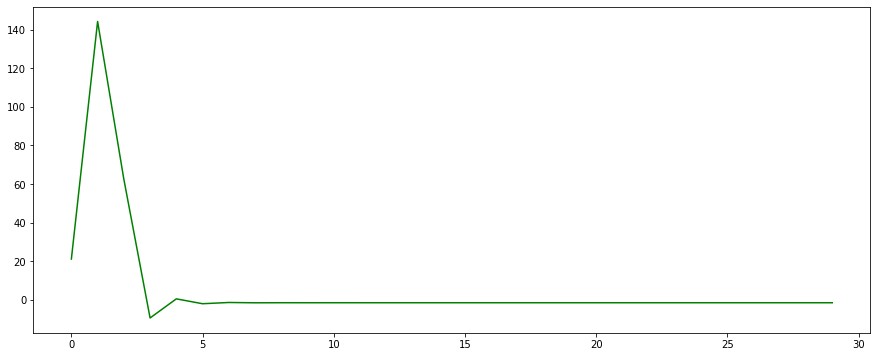

In [235]:
plt.figure(figsize=(15,6))
plt.plot(predictions,color='green')# the graphs are not identical

# Israel

In [236]:
IR1=df

In [237]:
# Lets first work with some sample data 
IR1 = IR1.loc[(IR1['Cases']>0) & (IR1['Country/Region']=='Israel')]

In [238]:
IR1

,Country/Region,Cases,Month
Date,,,
2020-02-21,Israel,1,Feb
2020-02-22,Israel,1,Feb
2020-02-23,Israel,1,Feb
2020-02-24,Israel,1,Feb
2020-02-25,Israel,1,Feb
...,...,...,...
2020-09-17,Israel,175256,Sep
2020-09-18,Israel,179071,Sep
2020-09-19,Israel,183602,Sep


In [239]:
IR1 = IR1.drop(columns='Month')

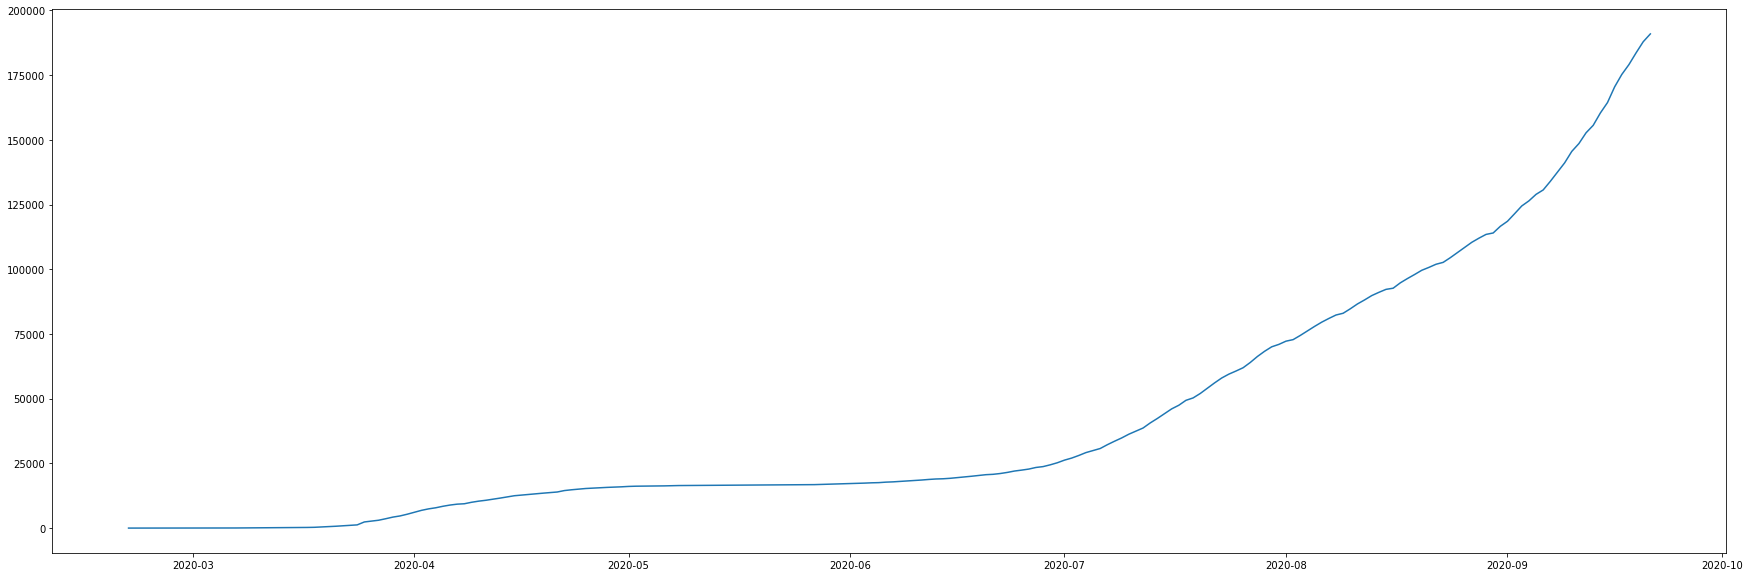

In [240]:

plt.figure(figsize=(30,10))
plt.plot(IR1.drop(columns='Country/Region'))

### Stationarity

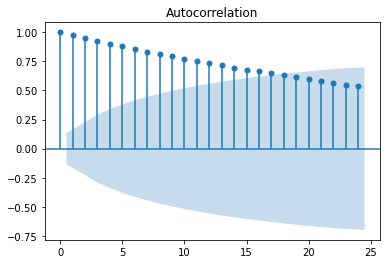

In [241]:
# visualize acf - auto correlation factor
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(IR1.drop(columns='Country/Region'));

In [242]:
IR1= IR1.drop(columns='Country/Region')

In [243]:
IR2=IR1.diff(periods=1)

In [244]:
IR2

,Cases
Date,
2020-02-21,NaN
2020-02-22,0.0
2020-02-23,0.0
2020-02-24,0.0
2020-02-25,0.0
...,...
2020-09-17,4791.0
2020-09-18,3815.0
2020-09-19,4531.0


In [245]:
IR2 = IR2.iloc[ 1:,]

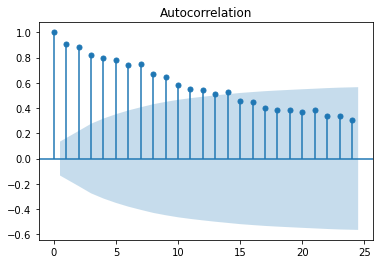

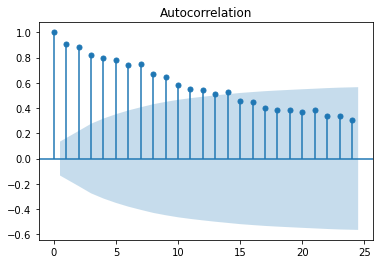

In [246]:
plot_acf(IR2)

In [247]:
## making it stationary by taking difference of 2
IR3=IR2.diff(periods=2)

In [248]:
IR3

,Cases
Date,
2020-02-22,NaN
2020-02-23,NaN
2020-02-24,0.0
2020-02-25,0.0
2020-02-26,1.0
...,...
2020-09-17,757.0
2020-09-18,-2248.0
2020-09-19,-260.0


In [249]:

IR3 = IR3.iloc[ 2:,]

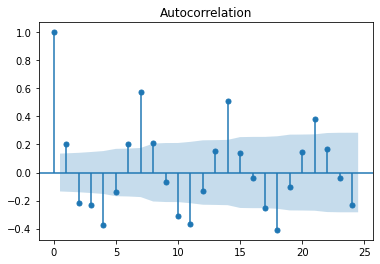

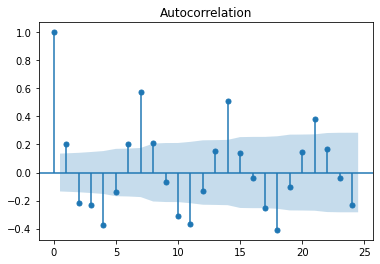

In [250]:
plot_acf(IR3)

# AR model

In [251]:
IR3.shape

(211, 1)

In [252]:
## Creating training and test sets
train=IR3[:180]
test=IR3[180:]

In [253]:
## Applying autoregressive model
from statsmodels.tsa.ar_model import AR

In [254]:
## model creation
ar_model=AR(train) ## object creation
ar_model_fit=ar_model.fit()

In [255]:
##making prediction
prediction=ar_model_fit.predict(start=180,end=211)

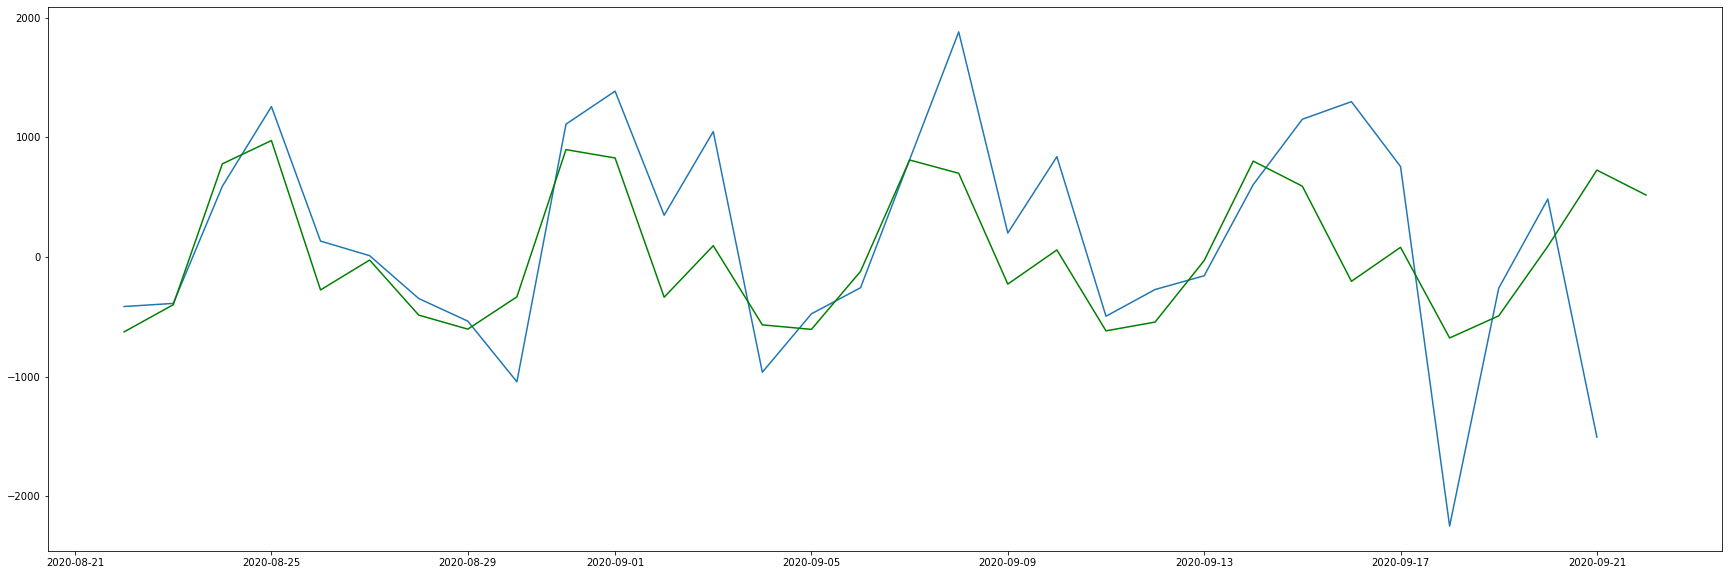

In [256]:
plt.figure(figsize=(30,10))
plt.plot(test)
plt.plot(prediction,color='green')#the test and prediction graph slightly differ lets apply ARIMA model

# ARIMA

In [257]:
## importing the library
from statsmodels.tsa.arima_model import ARIMA

In [258]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))# order(p,d,q)

model_arima_fit = model_arima.fit()

In [259]:
## evaluate the model
print(model_arima_fit.aic)

2663.9294690787265


In [260]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=30)[0]

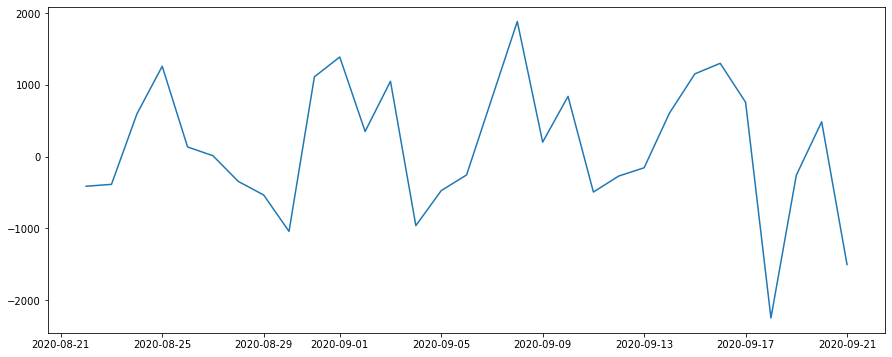

In [261]:
## plotting the test data
plt.figure(figsize=(15,6))
plt.plot(test)

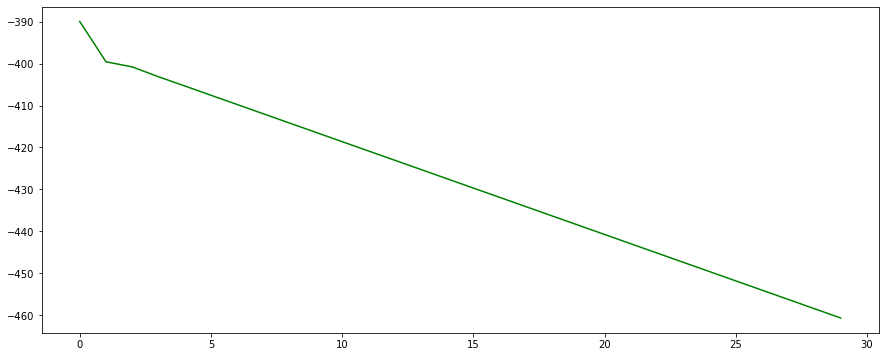

In [262]:
## plotting the forecasted values
plt.figure(figsize=(15,6))
plt.plot(predictions,color='green')#graphs are not identical so we can go for tuning

In [263]:
## Geeting the optimal values of p,d and q
import itertools

p =d= q=range(0,6)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [264]:
import warnings
warnings.filterwarnings('ignore')

In [265]:
for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 2599.744245535136
(0, 0, 1) 2563.811342108487
(0, 0, 2) 2519.7790926145326
(0, 0, 3) 2517.5596174229595
(0, 0, 4) 2518.009515723205
(0, 0, 5) 2509.836199548004
(0, 1, 0) 2665.1724338728304
(0, 1, 1) 2593.46912065492
(0, 1, 2) 2556.439528008569
(0, 1, 3) 2514.1652366810067
(0, 1, 4) 2508.325868878528
(0, 1, 5) 2507.9187729095756
(0, 2, 0) 2796.6152386934955
(0, 2, 1) 2658.4675799547945
(0, 2, 2) 2595.1889941865984
(0, 2, 3) 2554.202392231695
(0, 2, 4) 2513.4203750057977
(0, 2, 5) 2506.9084911144
(1, 0, 0) 2592.948653389624
(1, 0, 1) 2540.2715820818607
(1, 0, 2) 2517.230339739319
(1, 1, 0) 2663.9294690787265
(1, 1, 1) 2586.2514146417707
(1, 1, 3) 2507.7560242659083
(1, 2, 0) 2771.7289389998014
(2, 0, 0) 2561.0636199815176
(2, 0, 1) 2543.7161903770866
(2, 0, 2) 2519.1945742554904
(2, 0, 3) 2497.5338243310075
(2, 1, 0) 2628.0279799492437
(2, 1, 1) 2555.1757504464576
(2, 1, 3) 2509.488404249845
(2, 2, 0) 2698.7359349815665
(2, 2, 1) 2622.4735603820727
(2, 2, 3) 2532.9601339009437


In [266]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4,0,5))# order(p,d,q)

In [267]:
model_arima_fit = model_arima.fit()

print(model_arima_fit.aic)

2472.6442318474524


In [268]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=30)[0]

In [269]:
predictions

array([-648.1613381 ,   80.891756  ,  557.86853891,  593.8288114 ,
        161.28397012, -395.67871374, -635.16743322, -366.53949434,
        198.9200546 ,  615.07424726,  553.65676263,   63.80676974,
       -466.75388765, -618.2087658 , -270.50972025,  301.73479782,
        646.35845927,  491.0987839 ,  -41.16349679, -529.54075414,
       -587.86005329, -169.94179294,  393.89767337,  657.97554127,
        413.57206711, -146.06826876, -578.50241336, -541.85412802,
        -65.07742332,  474.93410445])

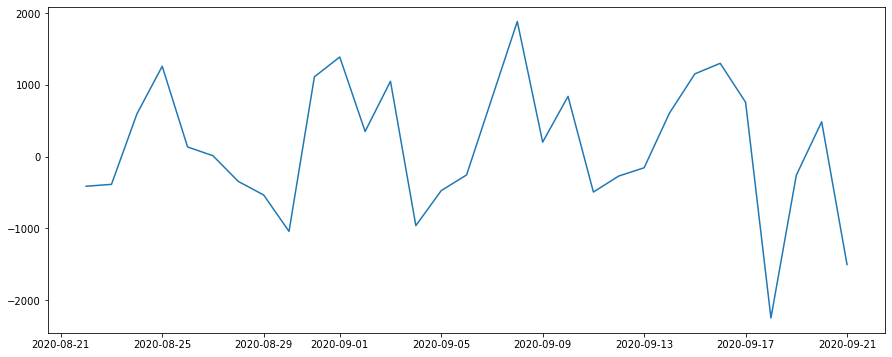

In [270]:
plt.figure(figsize=(15,6))
plt.plot(test)

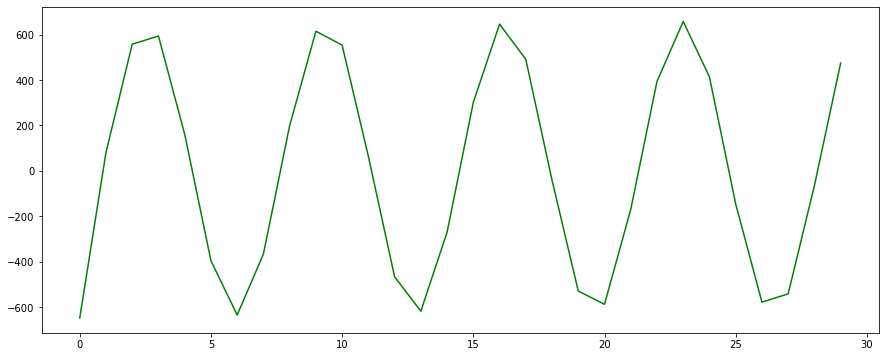

In [271]:
plt.figure(figsize=(15,6))
plt.plot(predictions,color='green')

# World covid-19 confirm cases prediction

In [272]:
W = pd.read_csv('time_series_covid19_confirmed_global.csv' )

In [273]:
W.drop(columns=['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

In [274]:
W

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,Albania,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,Algeria,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,Andorra,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,Angola,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,Western Sahara,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,Yemen,0,0,0,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,Zambia,0,0,0,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


### Data Preprocessing

### Transpose data

In [275]:
W = W.melt(id_vars="Country/Region", 
        var_name="Date", 
        value_name="Cases")

In [276]:
W.drop(columns='Country/Region', axis=0, inplace=True)

In [277]:
W.head()

,Date,Cases
0,1/22/20,0
1,1/22/20,0
2,1/22/20,0
3,1/22/20,0
4,1/22/20,0


In [278]:
# time series model requires Date/time to be in the datetime type not object type.
# so convert it to datetime.

W['Date']=pd.to_datetime(W['Date'])

In [279]:
W=W.groupby('Date').sum()

In [280]:
W

,Cases
Date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
...,...
2020-09-17,30175313
2020-09-18,30499534
2020-09-19,30780755


In [281]:
W.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2020-01-22 to 2020-09-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Cases   244 non-null    int64
dtypes: int64(1)
memory usage: 3.8 KB


In [282]:
W.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2020-01-22 to 2020-09-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Cases   244 non-null    int64
dtypes: int64(1)
memory usage: 3.8 KB


In [283]:
W1 = W

In [284]:
W1

,Cases
Date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
...,...
2020-09-17,30175313
2020-09-18,30499534
2020-09-19,30780755


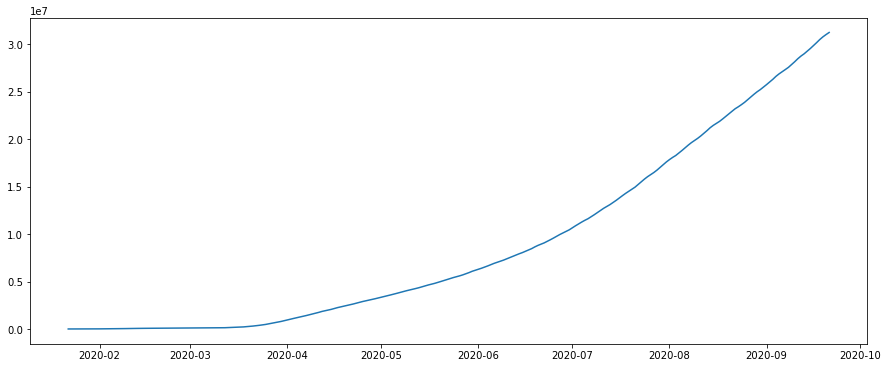

In [285]:
# plotting the world data
plt.figure(figsize=(15,6))
plt.plot(W1)

### Stationarity

In [286]:
# visualize acf - auto correlation factor
from statsmodels.graphics.tsaplots import plot_acf

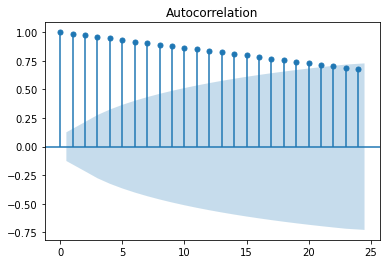

In [287]:
# visualize autocorrelation plot
plot_acf(W1);

In [288]:
# converting the data to be stationary by taking difference of 1
W2 = W1.diff(periods=1)

In [289]:
W2

,Cases
Date,
2020-01-22,NaN
2020-01-23,99.0
2020-01-24,287.0
2020-01-25,493.0
2020-01-26,684.0
...,...
2020-09-17,313364.0
2020-09-18,324221.0
2020-09-19,281221.0


In [290]:
W2.iloc[1:,]

,Cases
Date,
2020-01-23,99.0
2020-01-24,287.0
2020-01-25,493.0
2020-01-26,684.0
2020-01-27,809.0
...,...
2020-09-17,313364.0
2020-09-18,324221.0
2020-09-19,281221.0


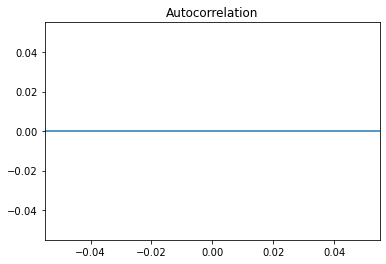

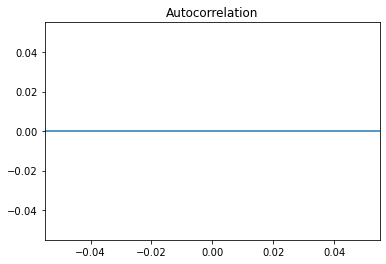

In [291]:
plot_acf(W2)#there is some issue in the data frame or the library.

In [292]:
W3 = W2.diff(periods=2)# converting the data to be stationary by taking difference of 2

In [293]:
W3 #after period 2 it has to provide 2 nan but instead of that we get 3 nan here.

,Cases
Date,
2020-01-22,NaN
2020-01-23,NaN
2020-01-24,NaN
2020-01-25,394.0
2020-01-26,397.0
...,...
2020-09-17,30072.0
2020-09-18,20214.0
2020-09-19,-32143.0


In [294]:
W3=W1.iloc[2:,]

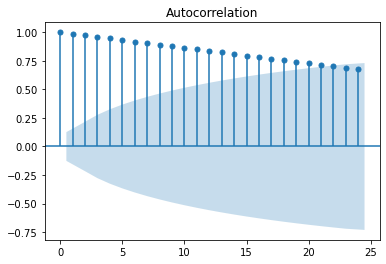

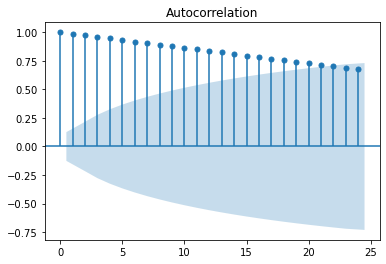

In [295]:
plot_acf(W3)

In [296]:
W4 = W3.diff(periods=3)# converting the data to be stationary by taking difference of 3

In [297]:
W4

,Cases
Date,
2020-01-24,NaN
2020-01-25,NaN
2020-01-26,NaN
2020-01-27,1986.0
2020-01-28,4144.0
...,...
2020-09-17,900663.0
2020-09-18,941592.0
2020-09-19,918806.0


In [298]:
W4=W4.iloc[3:,]

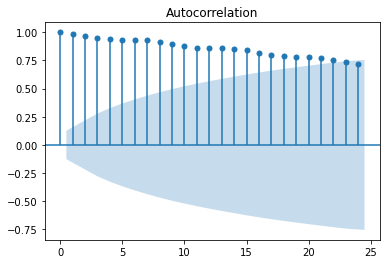

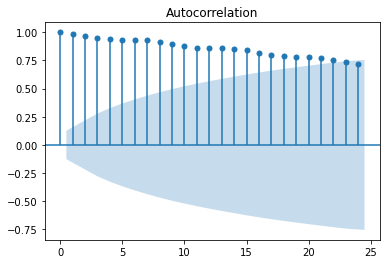

In [299]:
plot_acf(W4)

In [300]:
W5 = W4.diff(periods=4)

In [301]:
W5

,Cases
Date,
2020-01-27,NaN
2020-01-28,NaN
2020-01-29,NaN
2020-01-30,NaN
2020-01-31,2362.0
...,...
2020-09-17,66724.0
2020-09-18,148264.0
2020-09-19,119809.0


In [302]:
W5=W5.iloc[4:,]

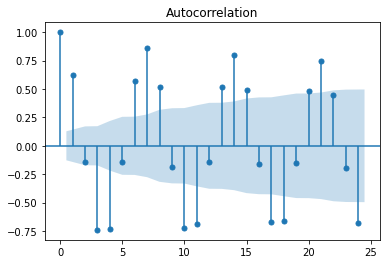

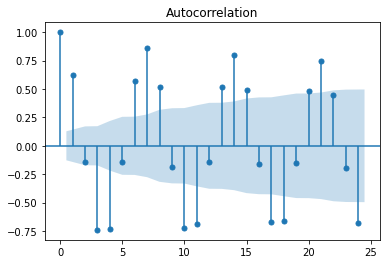

In [303]:
plot_acf(W5)

In [304]:
W5.shape

(235, 1)

# AR model

In [305]:
## Creating training and test sets
train=W5[:176]
test=W5[176:]

In [306]:
## Applying autoregressive model
from statsmodels.tsa.ar_model import AR

In [307]:
## model creation
ar_model=AR(train) ## object creation
ar_model_fit=ar_model.fit()

In [308]:
##making prediction
prediction=ar_model_fit.predict(start=176,end=235)

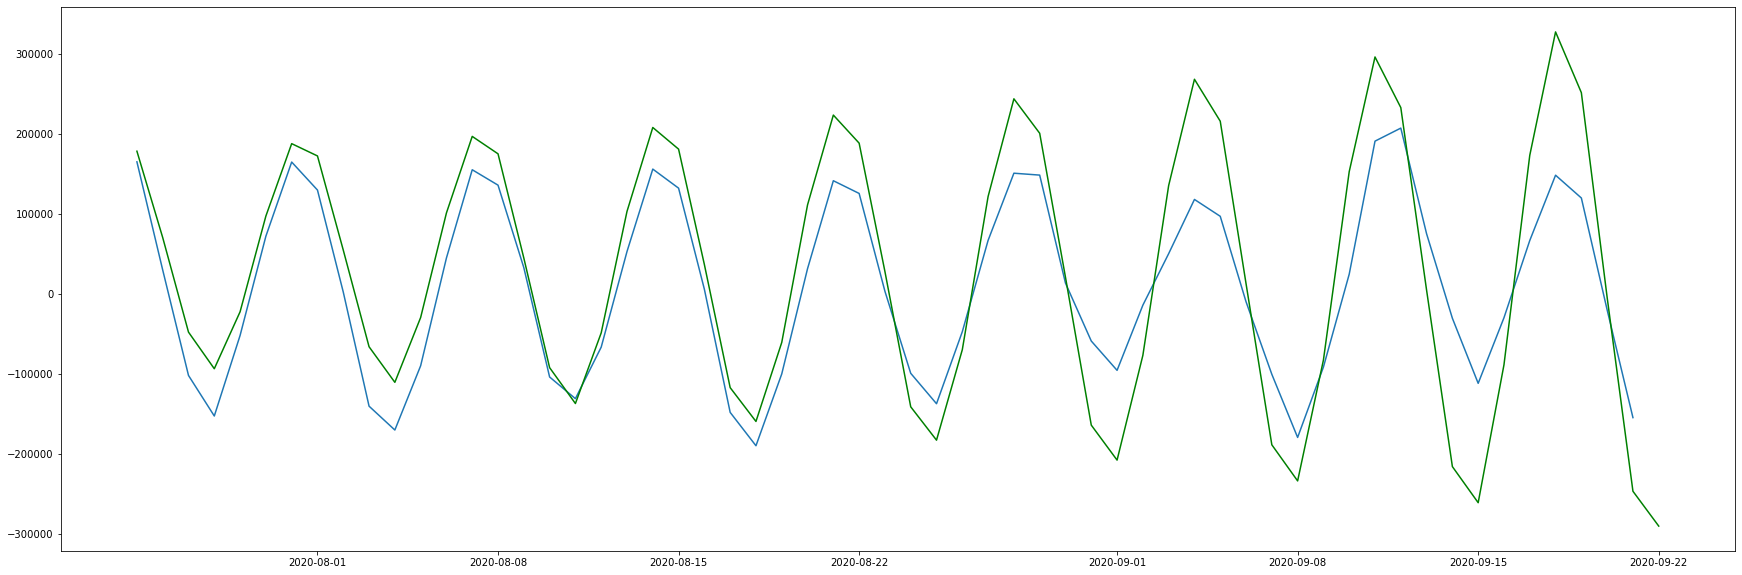

In [309]:
plt.figure(figsize=(30,10))
plt.plot(test)
plt.plot(prediction,color='green')

# ARIMA

In [310]:
## importing the library
from statsmodels.tsa.arima_model import ARIMA

In [311]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))# order(p,d,q)

model_arima_fit = model_arima.fit()

In [312]:
## evaluate the model
print(model_arima_fit.aic)

4068.564389867776


In [313]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=44)[0]

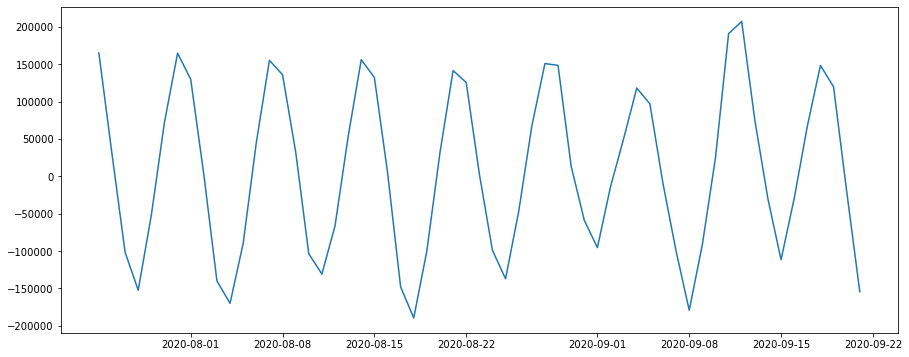

In [314]:
## plotting the test data
plt.figure(figsize=(15,6))
plt.plot(test)

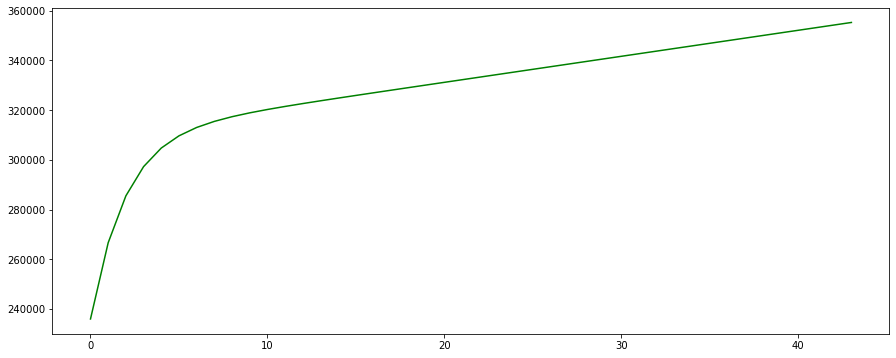

In [315]:
## plotting the forecasted values
plt.figure(figsize=(15,6))
plt.plot(predictions,color='green')#graphs are not identical so we can go for tuning

In [316]:

## Geeting the optimal values of p,d and q
import itertools

p =d= q=range(0,6)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [317]:
for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 4247.32403593791
(0, 0, 1) 4069.0229709039977
(0, 0, 2) 3976.1219960075787
(0, 0, 3) 3884.2722469367736
(0, 0, 5) 3826.3545288937075
(0, 1, 0) 4142.187252417692
(0, 1, 1) 4029.041229164959
(0, 1, 2) nan
(0, 1, 3) 3952.5534151623838
(0, 1, 4) 3862.503875473153
(0, 1, 5) 3892.82843383306
(0, 2, 0) 4080.2974676622675
(0, 2, 1) 4044.7819418563918
(0, 2, 2) 3975.339179119859
(0, 2, 3) 3919.7879443743195
(0, 2, 5) 3851.599791621137
(1, 0, 0) 4144.214338389989
(1, 0, 1) 4017.8899033106863
(1, 0, 2) 3925.908247706787
(1, 0, 3) 3887.245574746169
(1, 0, 4) 3886.704213330544
(1, 1, 0) 4068.564389867776
(1, 1, 1) 4015.268062362863
(1, 1, 2) 3924.598308620734
(1, 1, 3) 3904.998012055982
(1, 1, 5) 3862.400529654385
(1, 2, 0) 4048.389146964929
(1, 2, 1) 4051.3603163582466
(1, 2, 2) 3998.374607381142
(2, 0, 0) 3889.5061613636217
(2, 0, 1) 3880.706790323671
(2, 0, 2) 3802.524362923724
(2, 0, 3) 3790.664066409665
(2, 0, 4) 3779.3942093871547
(2, 1, 0) 3885.1253101630223
(2, 1, 1) 3802.13927326

In [318]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4,1,0))# order(p,d,q)

model_arima_fit = model_arima.fit()

In [319]:
print(model_arima_fit.aic)

3703.2579704554187


In [320]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=52)[0]

In [321]:
predictions

array([168663.10813835,  71597.24204055, -36994.26377404, -71731.53644508,
        -7261.20943599, 107986.72512842, 187289.09498   , 170448.62631291,
        70758.64186747, -36248.10058021, -69234.97281256,  -3006.33099875,
       112514.02162482, 190116.43248735, 171261.222412  ,  70471.63110931,
       -35708.85303822, -66648.25759018,   1315.44052006, 116957.5436338 ,
       192955.66810919, 172002.29137834,  70198.23648978, -35139.65484086,
       -64018.7903033 ,   5662.39188499, 121379.91248771, 195753.26306766,
       172705.8058182 ,  69923.56418016, -34535.87282154, -61345.02312385,
        10030.31618089, 125783.48590714, 198506.94432466, 173373.29944006,
        69648.13372148, -33897.02431865, -58626.94020982,  14418.2832825 ,
       130167.62867159, 201216.44843822, 174005.31181036,  69372.78400868,
       -33222.59306756, -55864.71595573,  18825.52997033, 134531.59070785,
       203881.59188054, 174602.37134777,  69098.35395842, -32512.06588904])

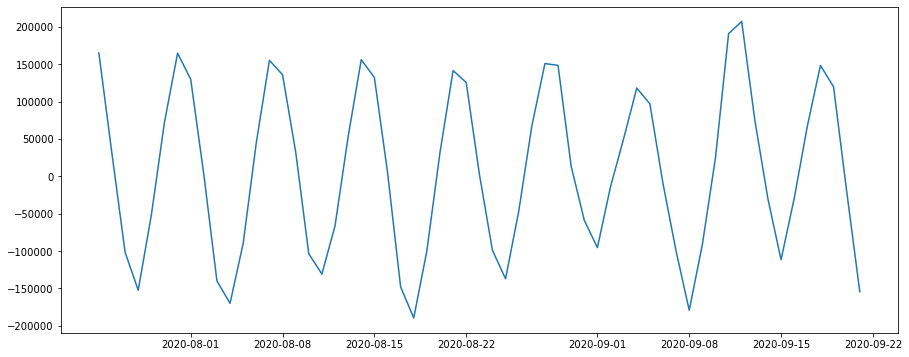

In [322]:
plt.figure(figsize=(15,6))
plt.plot(test)

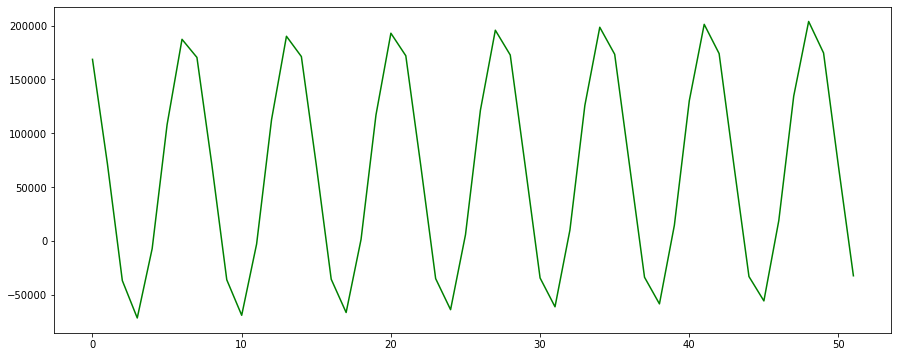

In [323]:
plt.figure(figsize=(15,6))
plt.plot(predictions,color='green')#graph seems to be identical

# Conclusion

## Out of  AR,ARIMA & FBPROPHET Models(FBPROPHET modeling in_Covid19 CONFIRMATION .ipynb) for 5 countries and world-wide confirmed cases- AR & FBPROPHET models give good identical graphs in comparision with ARIMA model. ARIMA MODEL gives identical graphs for prediction  in case of world-wide confirmed cases only. So we can prefer  AR or FBPROPHET model for future prediction in confirmed cases considering the countries individually.